# Placeholder for Text

In [1]:
#Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report, precision_recall_curve, auc, roc_curve
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from keras_visualizer import visualizer 
import import_ipynb

# Data

importing Jupyter notebook from Data_Cleaning_v3.ipynb


<string>:6: DtypeWarning: Columns (18,19,22) have mixed types. Specify dtype option on import or set low_memory=False.


Number of data points: 396029

<class 'pandas.core.frame.DataFrame'>
Int64Index: 396029 entries, 0 to 396029
Data columns (total 25 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396029 non-null  int64  
 1   term                  396029 non-null  object 
 2   int_rate              396029 non-null  float64
 3   installment           396029 non-null  float64
 4   emp_title             373102 non-null  object 
 5   emp_length            377728 non-null  object 
 6   home_ownership        396029 non-null  object 
 7   annual_inc            396029 non-null  float64
 8   verification_status   396029 non-null  object 
 9   issue_d               396029 non-null  object 
 10  loan_status           396029 non-null  object 
 11  purpose               396029 non-null  object 
 12  title                 394274 non-null  object 
 13  dti                   396029 non-null  float64
 14  earliest_cr_line     

term     pct
 36 months  302004  76.26%
 60 months   94025  23.74%

emp_title    pct
Teacher                       4389  1.18%
Manager                       4250  1.14%
Registered Nurse              1856  0.50%
RN                            1846  0.49%
Supervisor                    1830  0.49%
...                            ...    ...
Postman                          1  0.00%
McCarthy & Holthus, LLC          1  0.00%
jp flooring                      1  0.00%
Histology Technologist           1  0.00%
Gracon Services, Inc             1  0.00%

[173104 rows x 2 columns]

emp_length     pct
10+ years      126040  33.37%
2 years         35827   9.48%
< 1 year        31725   8.40%
3 years         31665   8.38%
5 years         26495   7.01%
1 year          25882   6.85%
4 years         23952   6.34%
6 years         20841   5.52%
7 years         20819   5.51%
8 years         19168   5.07%
9 years         15314   4.05%

home_ownership     pct
MORTGAGE          198347  50.08%
RENT              159790  40.35%
OWN                37746   9.53%
OTHER                112   0.03%
NONE                  31   0.01%
ANY                    3   0.00%

verification_status     pct
Verified                      139563  35.24%
Source Verified               131385  33.18%
Not Verified                  125081  31.58%

issue_d     pct
2014   102859  25.97%
2013    97662  24.66%
2015    94264  23.80%
2012    41202  10.40%
2016    28088   7.09%
2011    17435   4.40%
2010     9258   2.34%
2009     3826   0.97%
2008     1240   0.31%
2007      195   0.05%

loan_status     pct
Fully Paid        318357  80.39%
Charged Off        77672  19.61%

purpose     pct
debt_consolidation   234507  59.21%
credit_card           83019  20.96%
home_improvement      24029   6.07%
other                 21185   5.35%
major_purchase         8790   2.22%
small_business         5701   1.44%
car                    4697   1.19%
medical                4196   1.06%
moving                 2854   0.72%
vacation               2452   0.62%
house                  2201   0.56%
wedding                1812   0.46%
renewable_energy        329   0.08%
educational             257   0.06%

title     pct
Debt consolidation       152472  38.67%
Credit card refinancing   51487  13.06%
Home improvement          15264   3.87%
Other                     12930   3.28%
Debt Consolidation        11608   2.94%
...                         ...     ...
Daughter's Wedding Bill       1   0.00%
gotta move                    1   0.00%
creditcardrefi                1   0.00%
Debt/Home                     1   0.00%
Toxic Debt Payoff             1   0.00%

[48816 rows x 2 columns]

earliest_cr_line    pct
2000             29366  7.42%
2001             29083  7.34%
1999             26491  6.69%
2002             25901  6.54%
2003             23657  5.97%
...                ...    ...
1951                 3  0.00%
1950                 3  0.00%
1953                 2  0.00%
1944                 1  0.00%
1948                 1  0.00%

[65 rows x 2 columns]

initial_list_status     pct
f               238065  60.11%
w               157964  39.89%

application_type     pct
INDIVIDUAL            395318  99.82%
JOINT                    425   0.11%
DIRECT_PAY               286   0.07%

address    pct
AP    14308  3.61%
AE    14157  3.57%
AA    13919  3.51%
NJ     7091  1.79%
WI     7081  1.79%
LA     7068  1.78%
NV     7038  1.78%
AK     7034  1.78%
MA     7022  1.77%
VA     7022  1.77%
VT     7005  1.77%
NY     7004  1.77%
MS     7003  1.77%
TX     7000  1.77%
SC     6973  1.76%
ME     6972  1.76%
AR     6969  1.76%
OH     6969  1.76%
GA     6967  1.76%
ID     6958  1.76%
IN     6957  1.76%
KS     6945  1.75%
WV     6944  1.75%
RI     6940  1.75%
MO     6939  1.75%
IL     6934  1.75%
WY     6933  1.75%
NE     6927  1.75%
HI     6927  1.75%
IA     6926  1.75%
FL     6921  1.75%
AZ     6918  1.75%
CO     6914  1.75%
OK     6911  1.75%
CT     6904  1.74%
MN     6904  1.74%
NC     6901  1.74%
OR     6898  1.74%
CA     6898  1.74%
AL     6898  1.74%
MD     6896  1.74%
WA     6895  1.74%
UT     6887  1.74%
SD     6887  1.74%
MT     6883  1.74%
DE     6874  1.74%
TN     6869  1.73%
ND     6858  1.73%
MI     6854  1.73%
DC     6842  1.73%
NM     6842  1.73%
PA     6825  1.72%
NH     6818  1.72%
KY     6800  1.72%

loan_status     pct
0       318357  80.39%
1        77672  19.61%

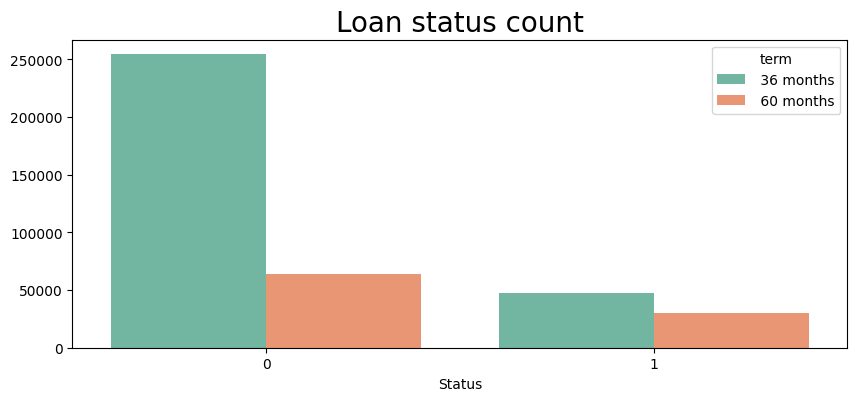

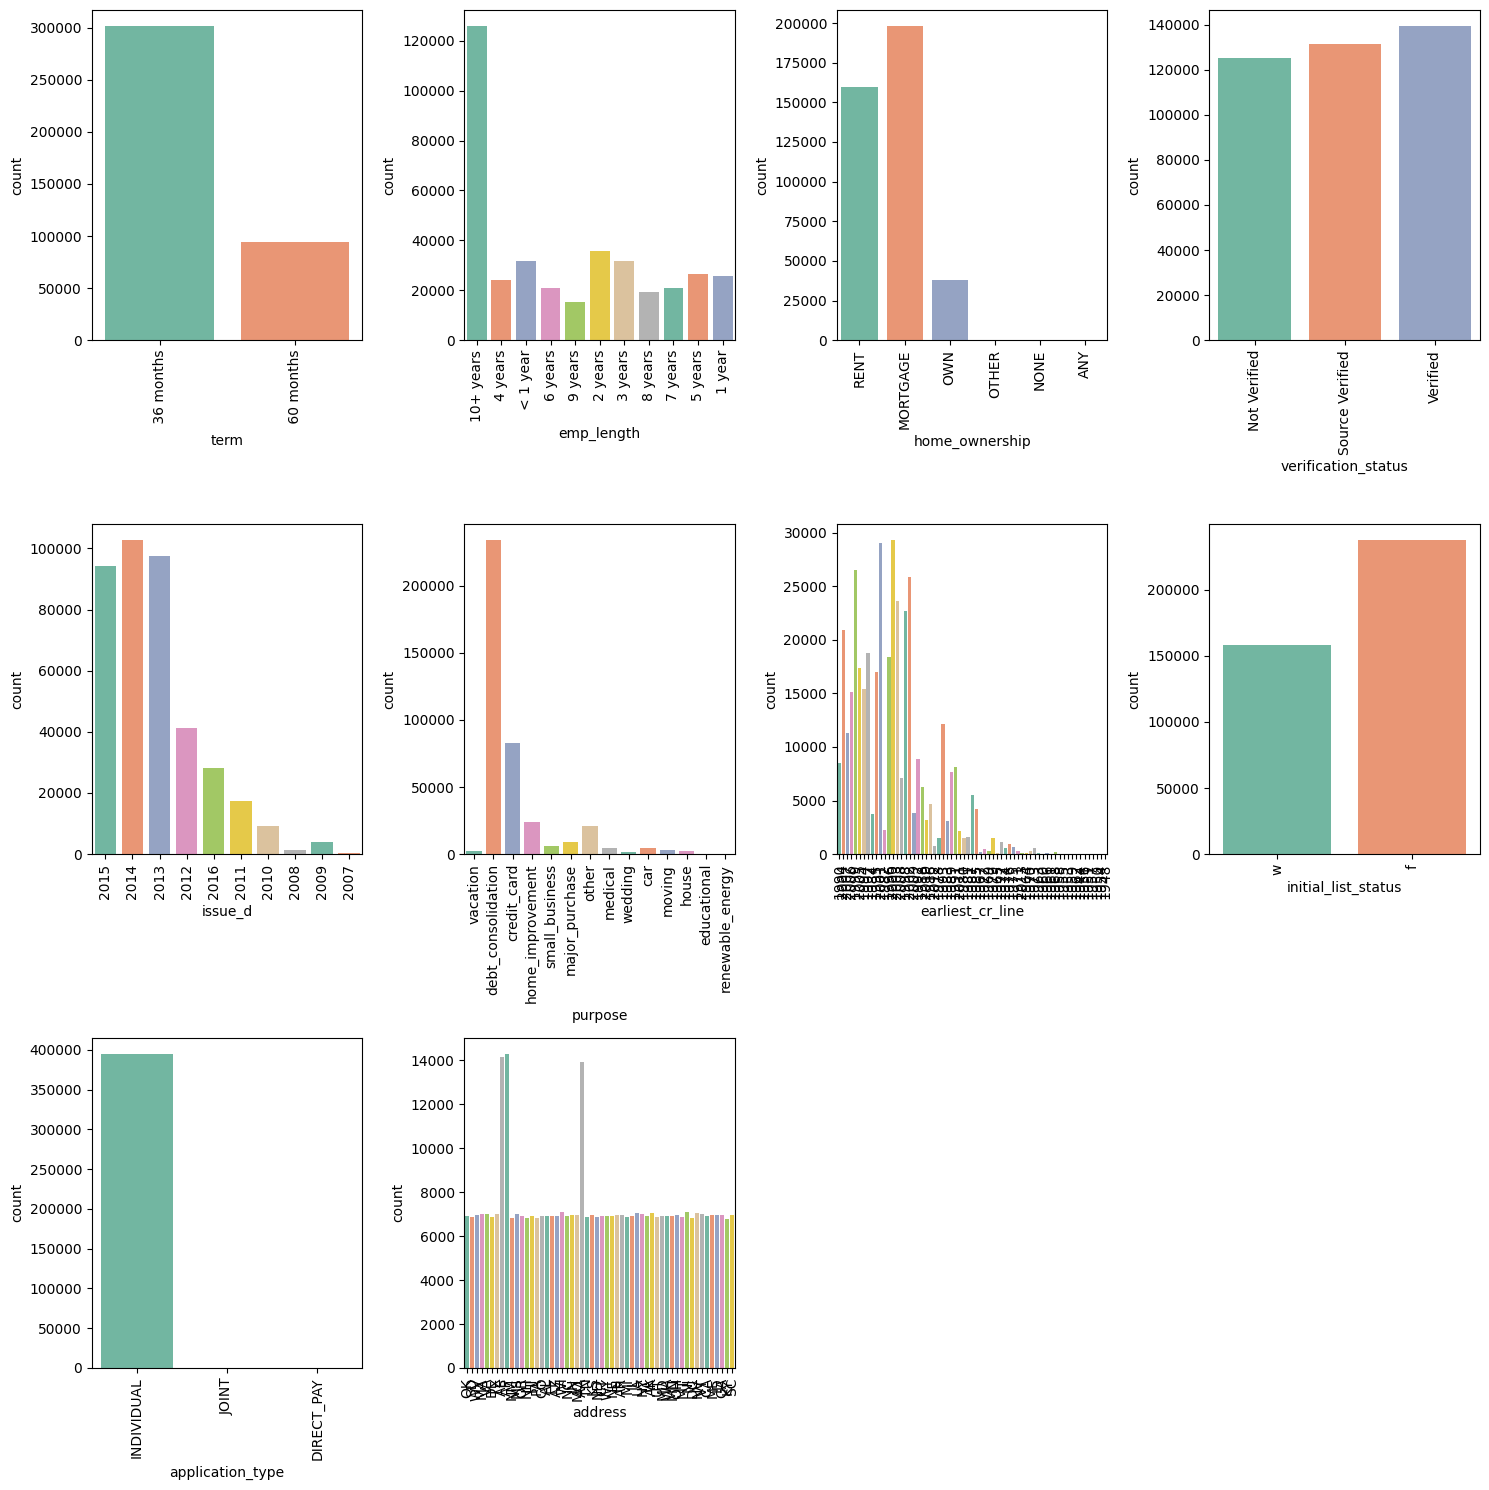

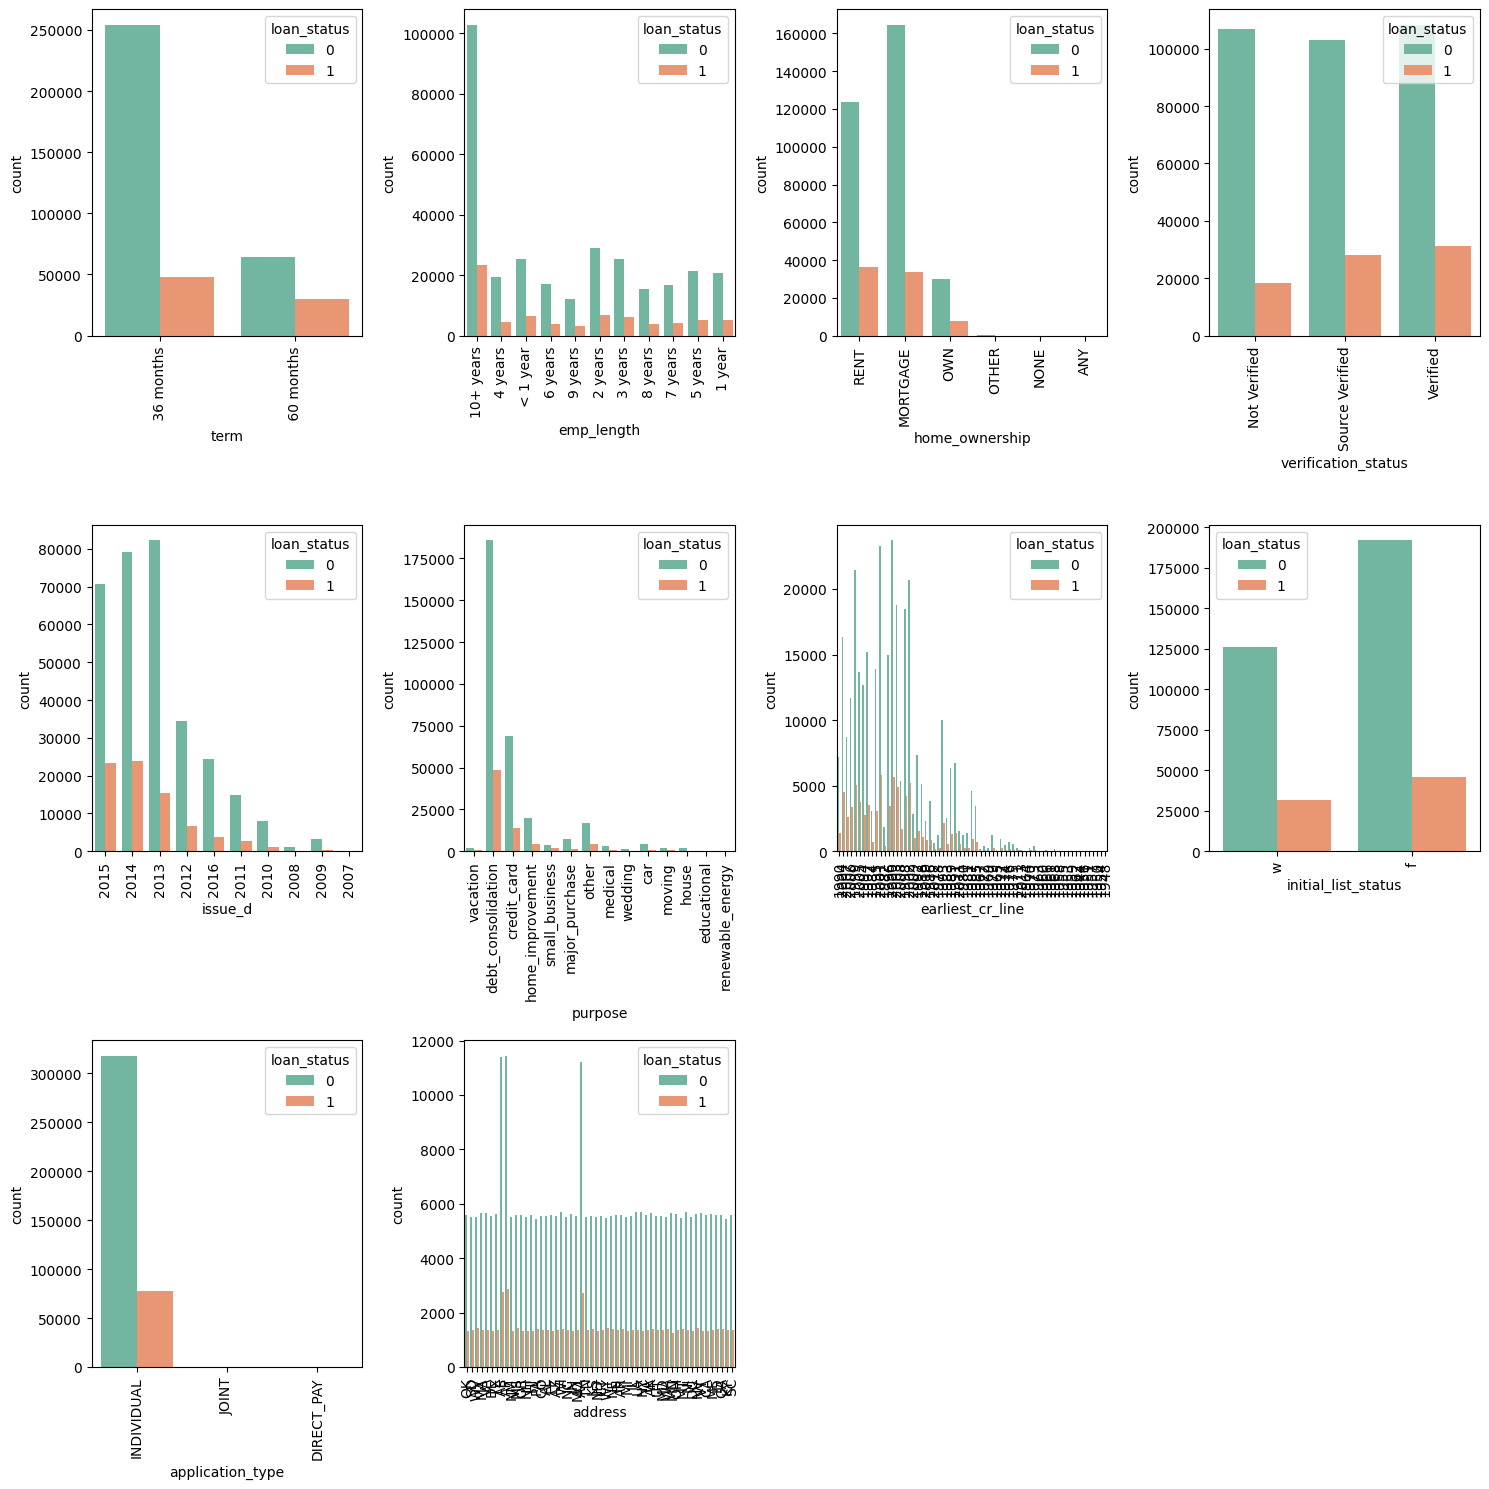

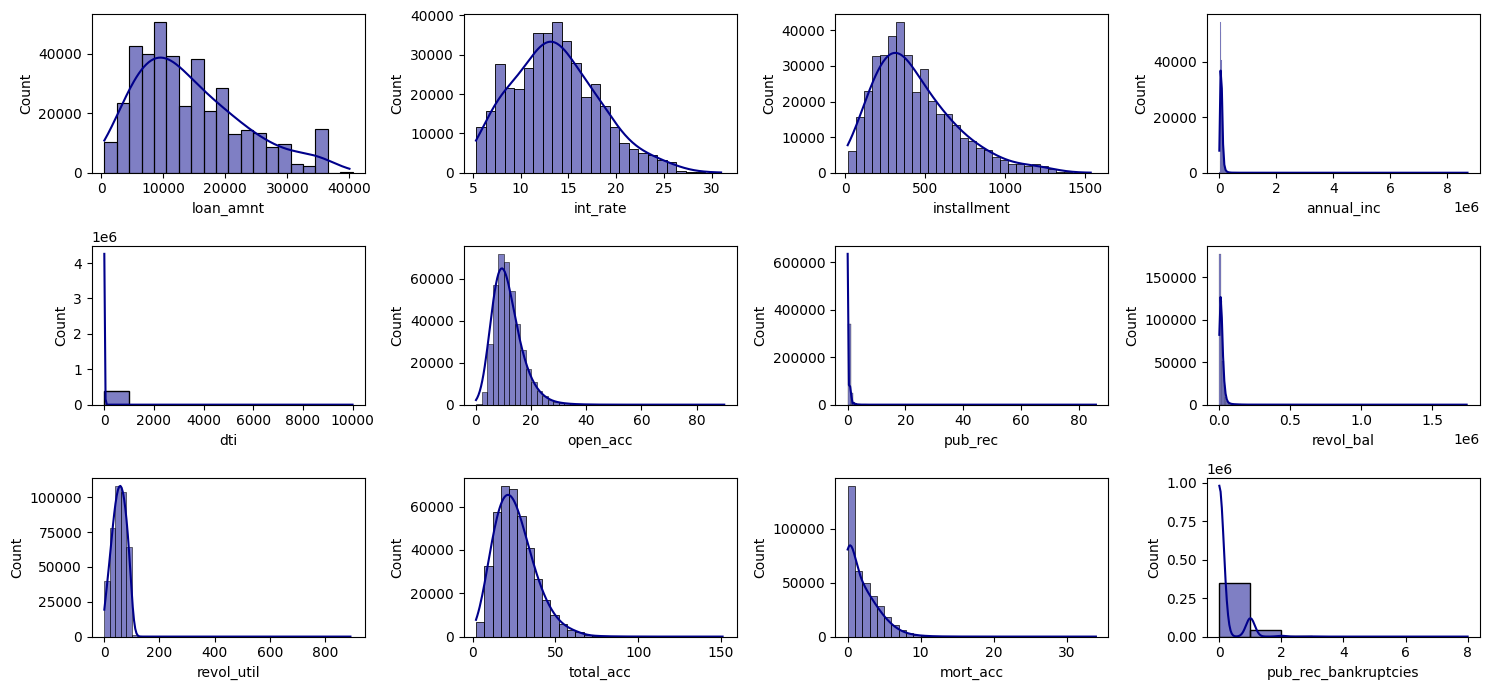

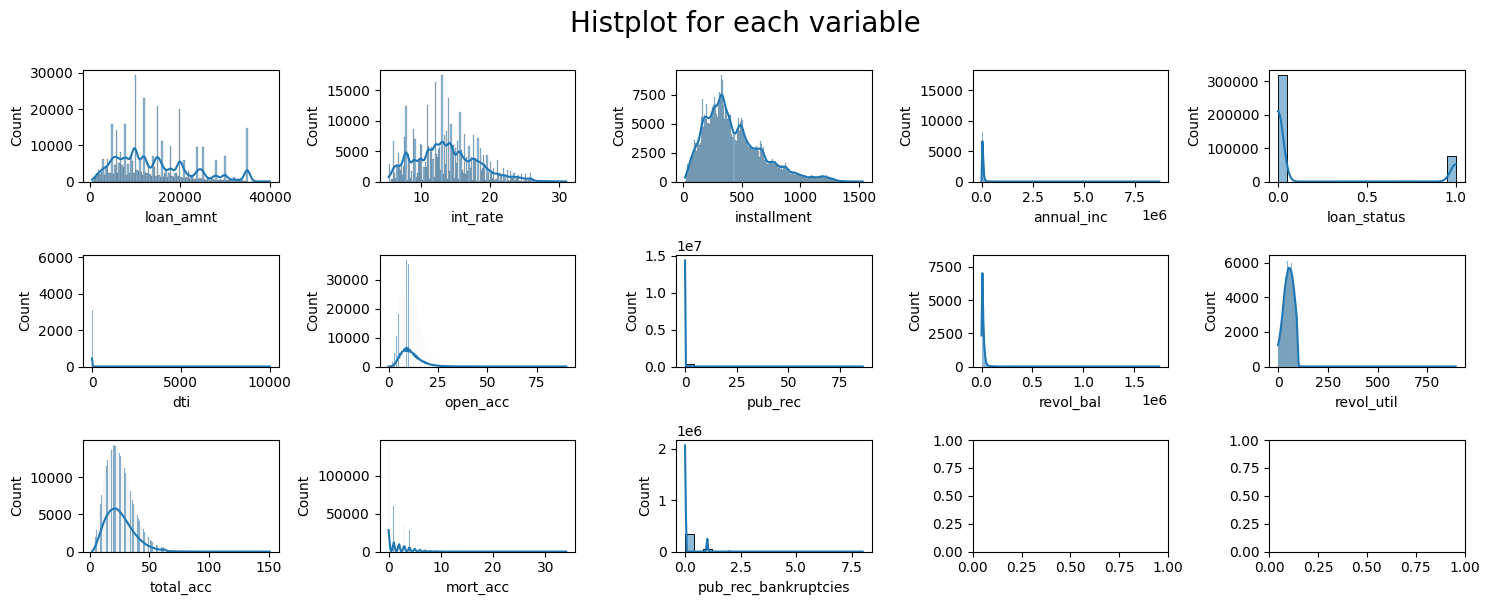

loan_amnt
# Adjusted p-values below 0.05:  45
int_rate
# Adjusted p-values below 0.05:  45
installment
# Adjusted p-values below 0.05:  43
annual_inc
# Adjusted p-values below 0.05:  35
loan_status
# Adjusted p-values below 0.05:  22
dti
# Adjusted p-values below 0.05:  43
open_acc
# Adjusted p-values below 0.05:  35
pub_rec
# Adjusted p-values below 0.05:  26
revol_bal
# Adjusted p-values below 0.05:  38
revol_util
# Adjusted p-values below 0.05:  42
total_acc
# Adjusted p-values below 0.05:  39
mort_acc


<string>:14: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
<string>:14: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
<string>:14: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
<string>:14: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
<string>:14: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.


# Adjusted p-values below 0.05:  35
pub_rec_bankruptcies


<string>:14: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.


# Adjusted p-values below 0.05:  37


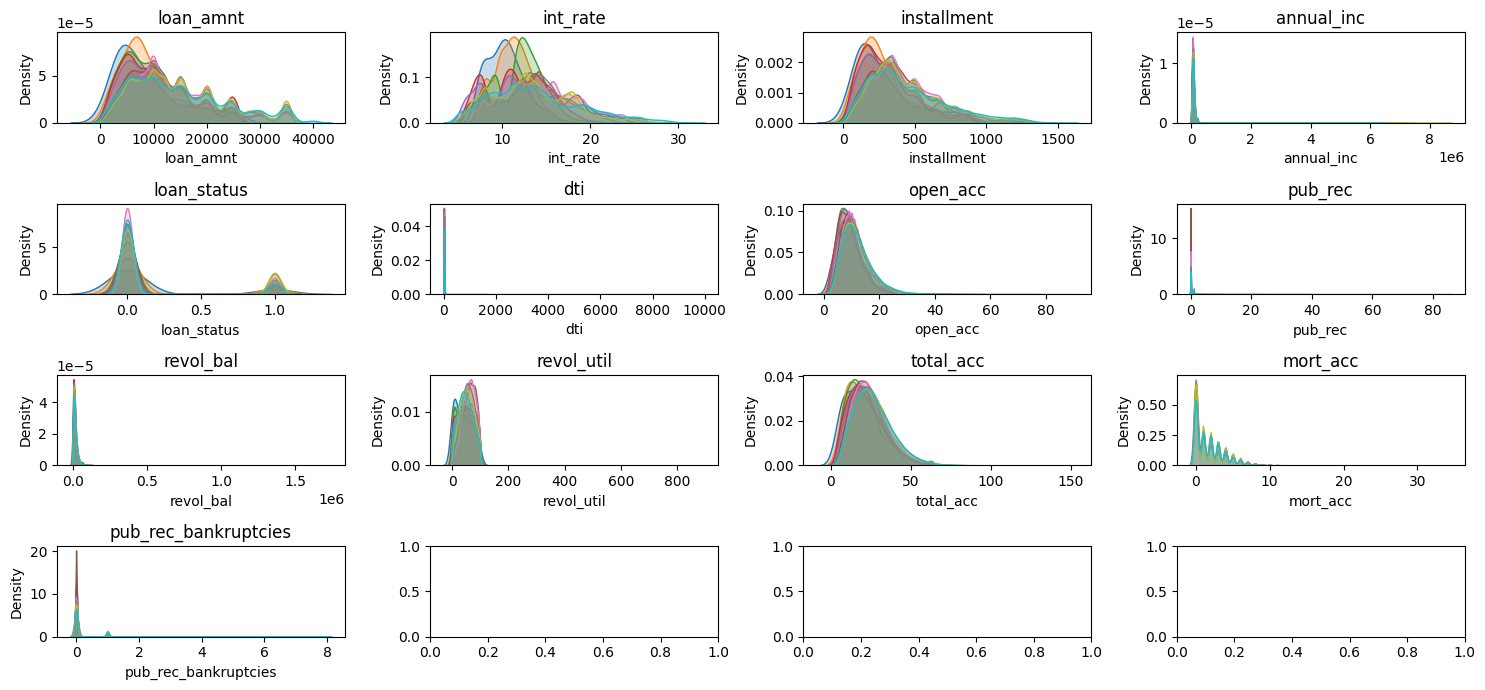

C:\Users\Remo_\AppData\Roaming\Python\Python311\site-packages\numpy\lib\function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
C:\Users\Remo_\AppData\Roaming\Python\Python311\site-packages\numpy\lib\function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
C:\Users\Remo_\AppData\Roaming\Python\Python311\site-packages\numpy\lib\function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
C:\Users\Remo_\AppData\Roaming\Python\Python311\site-packages\numpy\lib\function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
C:\Users\Remo_\AppData\Roaming\Python\Python311\site-packages\numpy\lib\function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
C:\Users\Remo_\AppData\Roaming\Python\Python311\site-pa

C:\Users\Remo_\AppData\Roaming\Python\Python311\site-packages\numpy\core\fromnumeric.py:758: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)
C:\Users\Remo_\AppData\Roaming\Python\Python311\site-packages\numpy\core\fromnumeric.py:758: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)
C:\Users\Remo_\AppData\Roaming\Python\Python311\site-packages\numpy\core\fromnumeric.py:758: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)
C:\Users\Remo_\AppData\Roaming\Python\Python311\site-packages\numpy\core\fromnumeric.py:758: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)
C:\Users\Remo_\AppData\Roaming\Python\Python311\site-packages\numpy\core\fromnumeric.py:758: UserWarning

term     pct
 36 months  302004  76.26%
 60 months   94025  23.74%

emp_length     pct
10+ years      144341  36.45%
2 years         35827   9.05%
< 1 year        31725   8.01%
3 years         31665   8.00%
5 years         26495   6.69%
1 year          25882   6.54%
4 years         23952   6.05%
6 years         20841   5.26%
7 years         20819   5.26%
8 years         19168   4.84%
9 years         15314   3.87%

home_ownership     pct
MORTGAGE          198347  50.08%
RENT              159790  40.35%
OWN                37746   9.53%
OTHER                112   0.03%
NONE                  31   0.01%
ANY                    3   0.00%

verification_status     pct
Verified                      139563  35.24%
Source Verified               131385  33.18%
Not Verified                  125081  31.58%

issue_d     pct
2014   102859  25.97%
2013    97662  24.66%
2015    94264  23.80%
2012    41202  10.40%
2016    28088   7.09%
2011    17435   4.40%
2010     9258   2.34%
2009     3826   0.97%
2008     1240   0.31%
2007      195   0.05%

purpose     pct
debt_consolidation   234507  59.21%
credit_card           83019  20.96%
home_improvement      24029   6.07%
other                 21185   5.35%
major_purchase         8790   2.22%
small_business         5701   1.44%
car                    4697   1.19%
medical                4196   1.06%
moving                 2854   0.72%
vacation               2452   0.62%
house                  2201   0.56%
wedding                1812   0.46%
renewable_energy        329   0.08%
educational             257   0.06%

earliest_cr_line    pct
2000             29366  7.42%
2001             29083  7.34%
1999             26491  6.69%
2002             25901  6.54%
2003             23657  5.97%
...                ...    ...
1951                 3  0.00%
1950                 3  0.00%
1953                 2  0.00%
1944                 1  0.00%
1948                 1  0.00%

[65 rows x 2 columns]

initial_list_status     pct
f               238065  60.11%
w               157964  39.89%

application_type     pct
INDIVIDUAL            395318  99.82%
JOINT                    425   0.11%
DIRECT_PAY               286   0.07%

address    pct
AP    14308  3.61%
AE    14157  3.57%
AA    13919  3.51%
NJ     7091  1.79%
WI     7081  1.79%
LA     7068  1.78%
NV     7038  1.78%
AK     7034  1.78%
MA     7022  1.77%
VA     7022  1.77%
VT     7005  1.77%
NY     7004  1.77%
MS     7003  1.77%
TX     7000  1.77%
SC     6973  1.76%
ME     6972  1.76%
AR     6969  1.76%
OH     6969  1.76%
GA     6967  1.76%
ID     6958  1.76%
IN     6957  1.76%
KS     6945  1.75%
WV     6944  1.75%
RI     6940  1.75%
MO     6939  1.75%
IL     6934  1.75%
WY     6933  1.75%
NE     6927  1.75%
HI     6927  1.75%
IA     6926  1.75%
FL     6921  1.75%
AZ     6918  1.75%
CO     6914  1.75%
OK     6911  1.75%
CT     6904  1.74%
MN     6904  1.74%
NC     6901  1.74%
OR     6898  1.74%
CA     6898  1.74%
AL     6898  1.74%
MD     6896  1.74%
WA     6895  1.74%
UT     6887  1.74%
SD     6887  1.74%
MT     6883  1.74%
DE     6874  1.74%
TN     6869  1.73%
ND     6858  1.73%
MI     6854  1.73%
DC     6842  1.73%
NM     6842  1.73%
PA     6825  1.72%
NH     6818  1.72%
KY     6800  1.72%

[1, 4, 5, 7, 8, 10, 12, 18, 19, 22]

['term',
 'emp_length',
 'home_ownership',
 'verification_status',
 'issue_d',
 'purpose',
 'earliest_cr_line',
 'initial_list_status',
 'application_type',
 'address']

['ohe__term_ 60 months',
 'ohe__home_ownership_RENT',
 'ohe__initial_list_status_w',
 'remainder__installment']

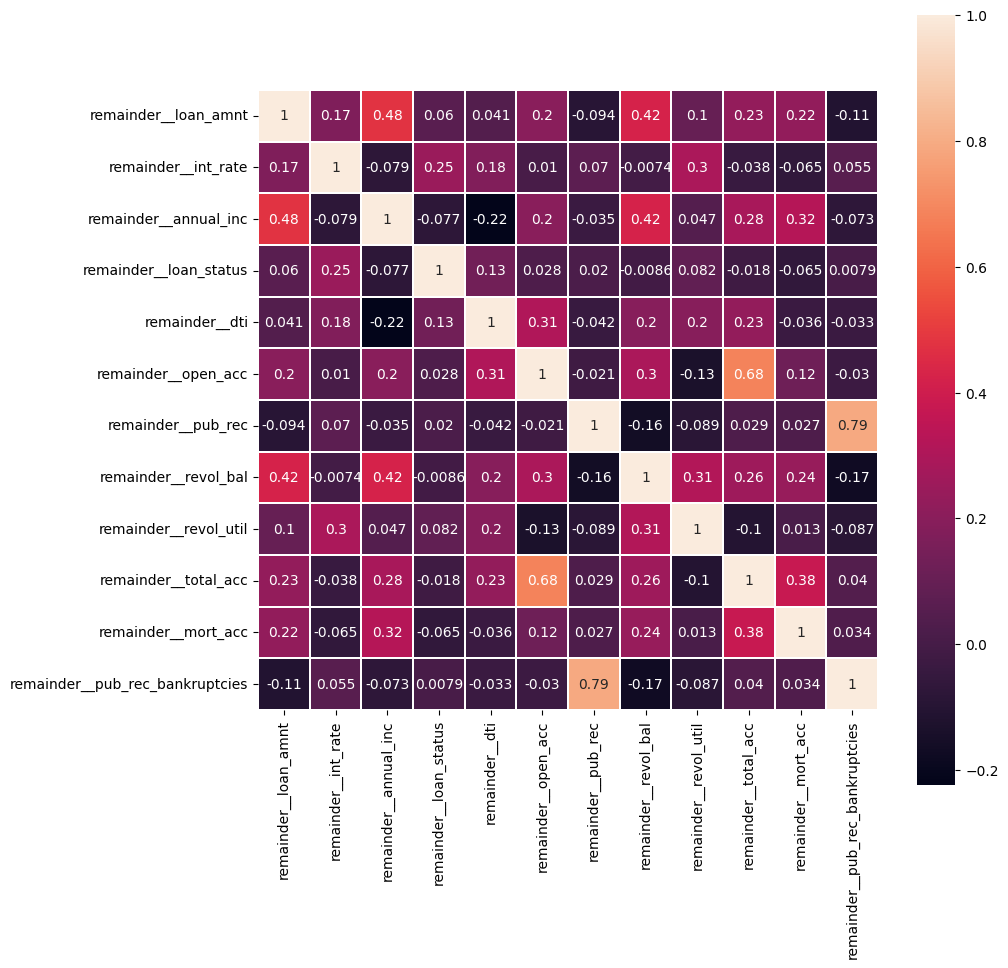

In [2]:
#Run the Data Cleaning file and import the data

import Data_Cleaning_v3 as data_cleaned


importing Jupyter notebook from Data_Cleaning_v3_macro.ipynb


<string>:6: DtypeWarning: Columns (18,19,22) have mixed types. Specify dtype option on import or set low_memory=False.


Number of data points: 396029

<class 'pandas.core.frame.DataFrame'>
Int64Index: 396029 entries, 0 to 396029
Data columns (total 25 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396029 non-null  int64  
 1   term                  396029 non-null  object 
 2   int_rate              396029 non-null  float64
 3   installment           396029 non-null  float64
 4   emp_title             373102 non-null  object 
 5   emp_length            377728 non-null  object 
 6   home_ownership        396029 non-null  object 
 7   annual_inc            396029 non-null  float64
 8   verification_status   396029 non-null  object 
 9   issue_d               396029 non-null  object 
 10  loan_status           396029 non-null  object 
 11  purpose               396029 non-null  object 
 12  title                 394274 non-null  object 
 13  dti                   396029 non-null  float64
 14  earliest_cr_line     

term     pct
 36 months  302004  76.26%
 60 months   94025  23.74%

emp_title    pct
Teacher                       4389  1.18%
Manager                       4250  1.14%
Registered Nurse              1856  0.50%
RN                            1846  0.49%
Supervisor                    1830  0.49%
...                            ...    ...
Postman                          1  0.00%
McCarthy & Holthus, LLC          1  0.00%
jp flooring                      1  0.00%
Histology Technologist           1  0.00%
Gracon Services, Inc             1  0.00%

[173104 rows x 2 columns]

emp_length     pct
10+ years      126040  33.37%
2 years         35827   9.48%
< 1 year        31725   8.40%
3 years         31665   8.38%
5 years         26495   7.01%
1 year          25882   6.85%
4 years         23952   6.34%
6 years         20841   5.52%
7 years         20819   5.51%
8 years         19168   5.07%
9 years         15314   4.05%

home_ownership     pct
MORTGAGE          198347  50.08%
RENT              159790  40.35%
OWN                37746   9.53%
OTHER                112   0.03%
NONE                  31   0.01%
ANY                    3   0.00%

verification_status     pct
Verified                      139563  35.24%
Source Verified               131385  33.18%
Not Verified                  125081  31.58%

issue_d     pct
2014   102859  25.97%
2013    97662  24.66%
2015    94264  23.80%
2012    41202  10.40%
2016    28088   7.09%
2011    17435   4.40%
2010     9258   2.34%
2009     3826   0.97%
2008     1240   0.31%
2007      195   0.05%

loan_status     pct
Fully Paid        318357  80.39%
Charged Off        77672  19.61%

purpose     pct
debt_consolidation   234507  59.21%
credit_card           83019  20.96%
home_improvement      24029   6.07%
other                 21185   5.35%
major_purchase         8790   2.22%
small_business         5701   1.44%
car                    4697   1.19%
medical                4196   1.06%
moving                 2854   0.72%
vacation               2452   0.62%
house                  2201   0.56%
wedding                1812   0.46%
renewable_energy        329   0.08%
educational             257   0.06%

title     pct
Debt consolidation       152472  38.67%
Credit card refinancing   51487  13.06%
Home improvement          15264   3.87%
Other                     12930   3.28%
Debt Consolidation        11608   2.94%
...                         ...     ...
Daughter's Wedding Bill       1   0.00%
gotta move                    1   0.00%
creditcardrefi                1   0.00%
Debt/Home                     1   0.00%
Toxic Debt Payoff             1   0.00%

[48816 rows x 2 columns]

earliest_cr_line    pct
2000             29366  7.42%
2001             29083  7.34%
1999             26491  6.69%
2002             25901  6.54%
2003             23657  5.97%
...                ...    ...
1951                 3  0.00%
1950                 3  0.00%
1953                 2  0.00%
1944                 1  0.00%
1948                 1  0.00%

[65 rows x 2 columns]

initial_list_status     pct
f               238065  60.11%
w               157964  39.89%

application_type     pct
INDIVIDUAL            395318  99.82%
JOINT                    425   0.11%
DIRECT_PAY               286   0.07%

address    pct
AP    14308  3.61%
AE    14157  3.57%
AA    13919  3.51%
NJ     7091  1.79%
WI     7081  1.79%
LA     7068  1.78%
NV     7038  1.78%
AK     7034  1.78%
MA     7022  1.77%
VA     7022  1.77%
VT     7005  1.77%
NY     7004  1.77%
MS     7003  1.77%
TX     7000  1.77%
SC     6973  1.76%
ME     6972  1.76%
AR     6969  1.76%
OH     6969  1.76%
GA     6967  1.76%
ID     6958  1.76%
IN     6957  1.76%
KS     6945  1.75%
WV     6944  1.75%
RI     6940  1.75%
MO     6939  1.75%
IL     6934  1.75%
WY     6933  1.75%
NE     6927  1.75%
HI     6927  1.75%
IA     6926  1.75%
FL     6921  1.75%
AZ     6918  1.75%
CO     6914  1.75%
OK     6911  1.75%
CT     6904  1.74%
MN     6904  1.74%
NC     6901  1.74%
OR     6898  1.74%
CA     6898  1.74%
AL     6898  1.74%
MD     6896  1.74%
WA     6895  1.74%
UT     6887  1.74%
SD     6887  1.74%
MT     6883  1.74%
DE     6874  1.74%
TN     6869  1.73%
ND     6858  1.73%
MI     6854  1.73%
DC     6842  1.73%
NM     6842  1.73%
PA     6825  1.72%
NH     6818  1.72%
KY     6800  1.72%

loan_status     pct
0       318357  80.39%
1        77672  19.61%

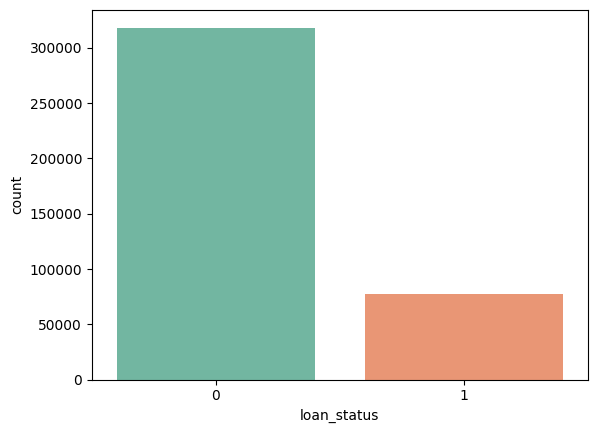

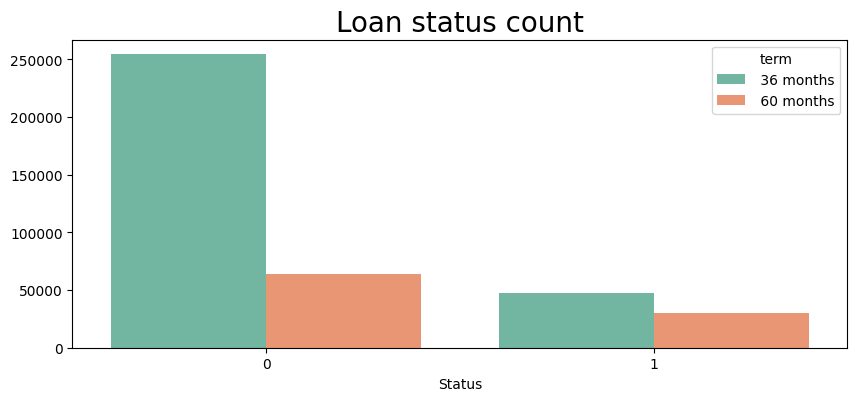

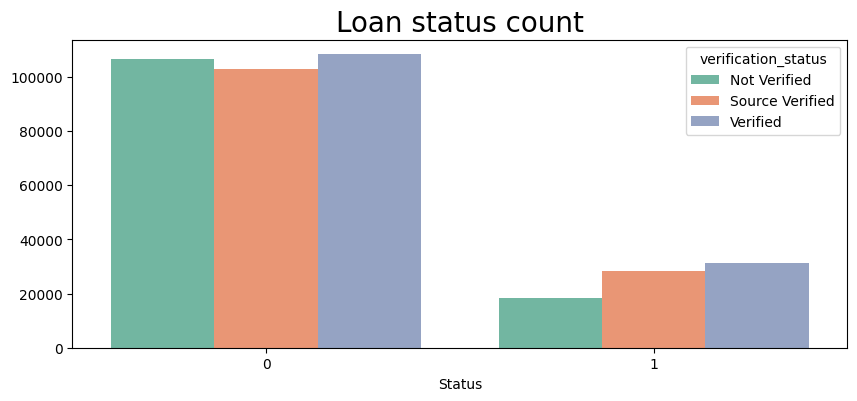

Spearman rank correlation coefficient: -0.07262436589226039
p-value: 0.0


emp_title  annual_inc
18                   Pilot   130580.00
19        Registered Nurse    85000.00
23          Office Manager    55000.00
24      Operations Manager    75000.00
26               Bartender    35000.00
...                    ...         ...
396009             Officer   106000.00
396015             Teacher    57400.00
396017             teacher    41000.00
396023  Operations Manager   138000.00
396026               Agent   110000.00

[105725 rows x 2 columns]

Correlation coefficients:
 annual_inc                            1.00
emp_title_Managing Director           0.14
emp_title_Vice President              0.13
emp_title_Physician                   0.12
emp_title_Director                    0.10
                                      ... 
emp_title_Assistant Manager          -0.03
emp_title_Server                     -0.03
emp_title_Office Manager             -0.04
emp_title_Administrative Assistant   -0.04
emp_title_Teacher                    -0.17
Name: annual_inc, Length: 269, dtype: float64


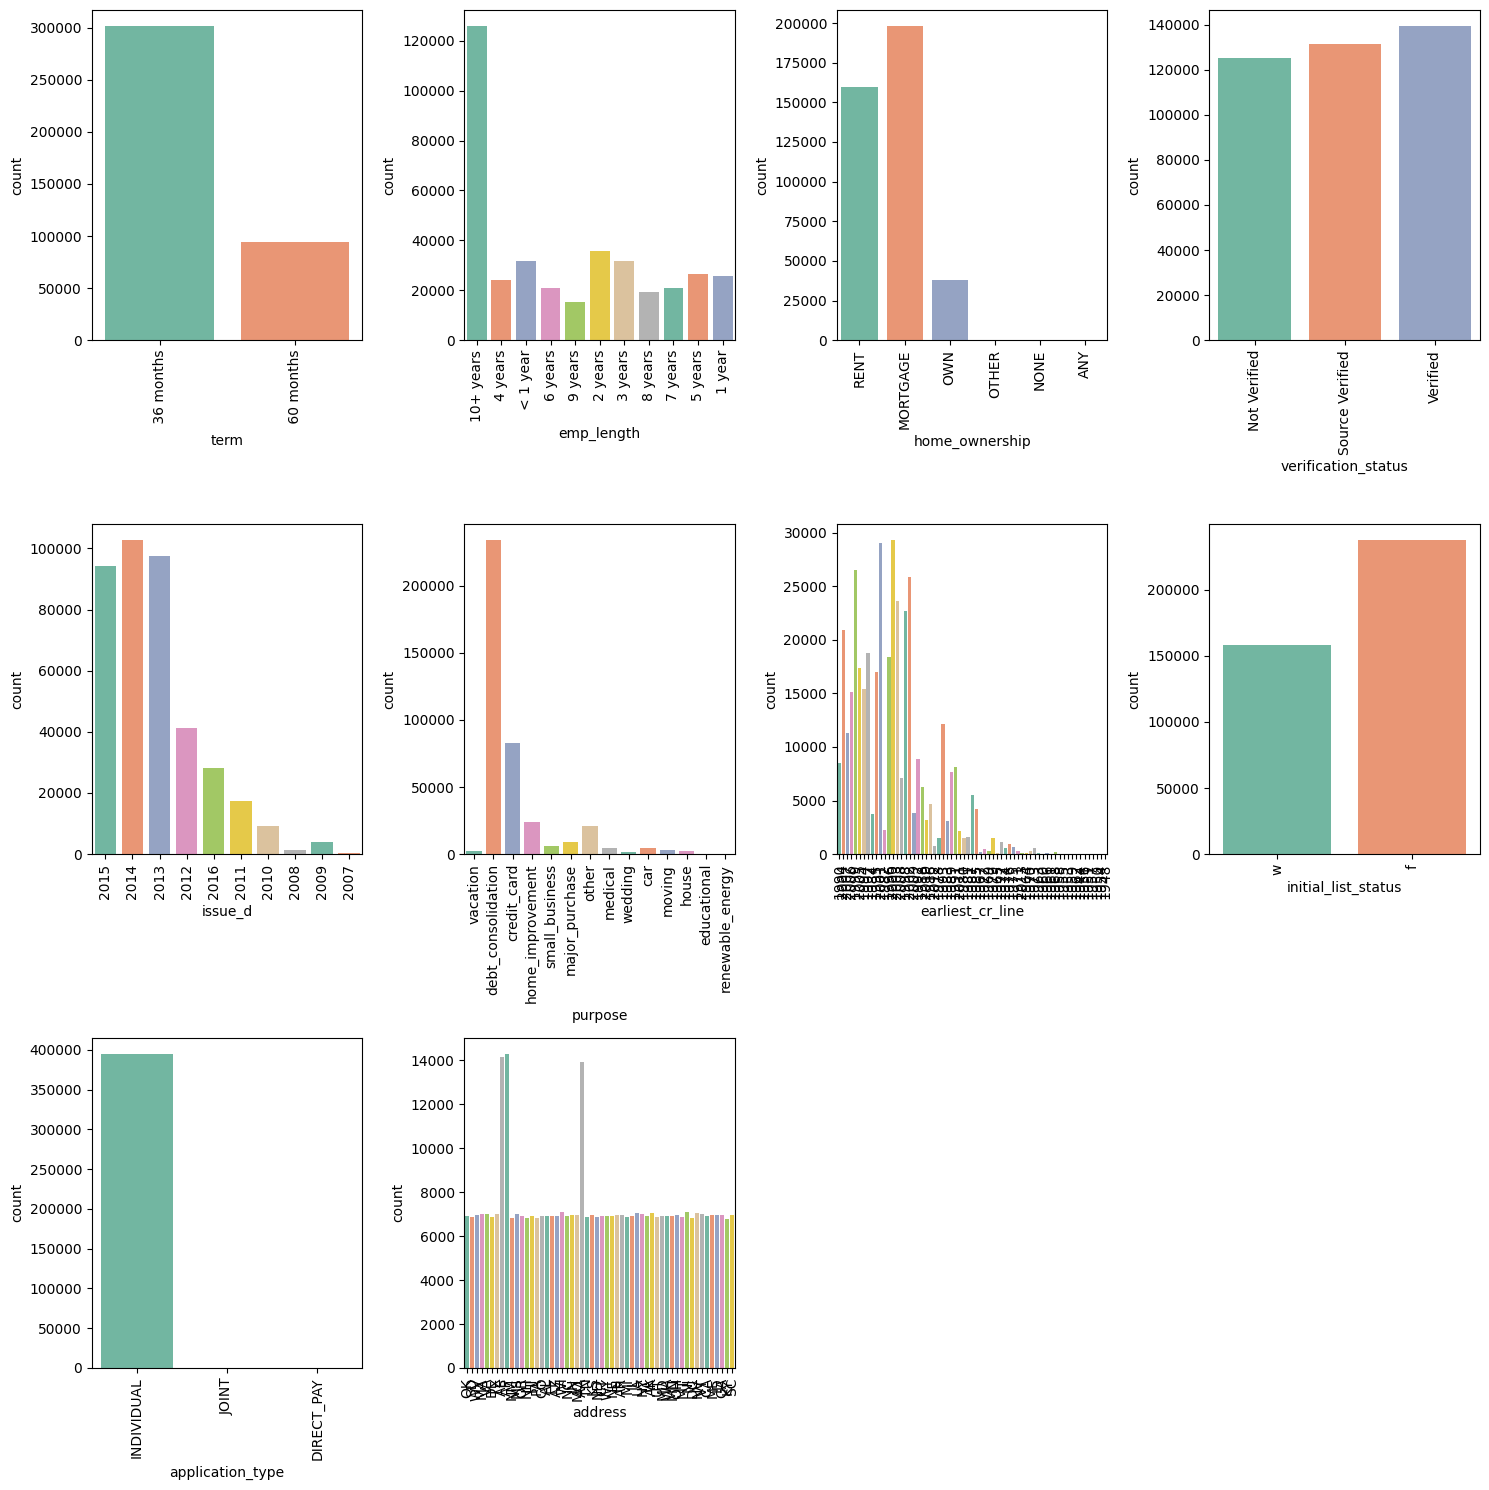

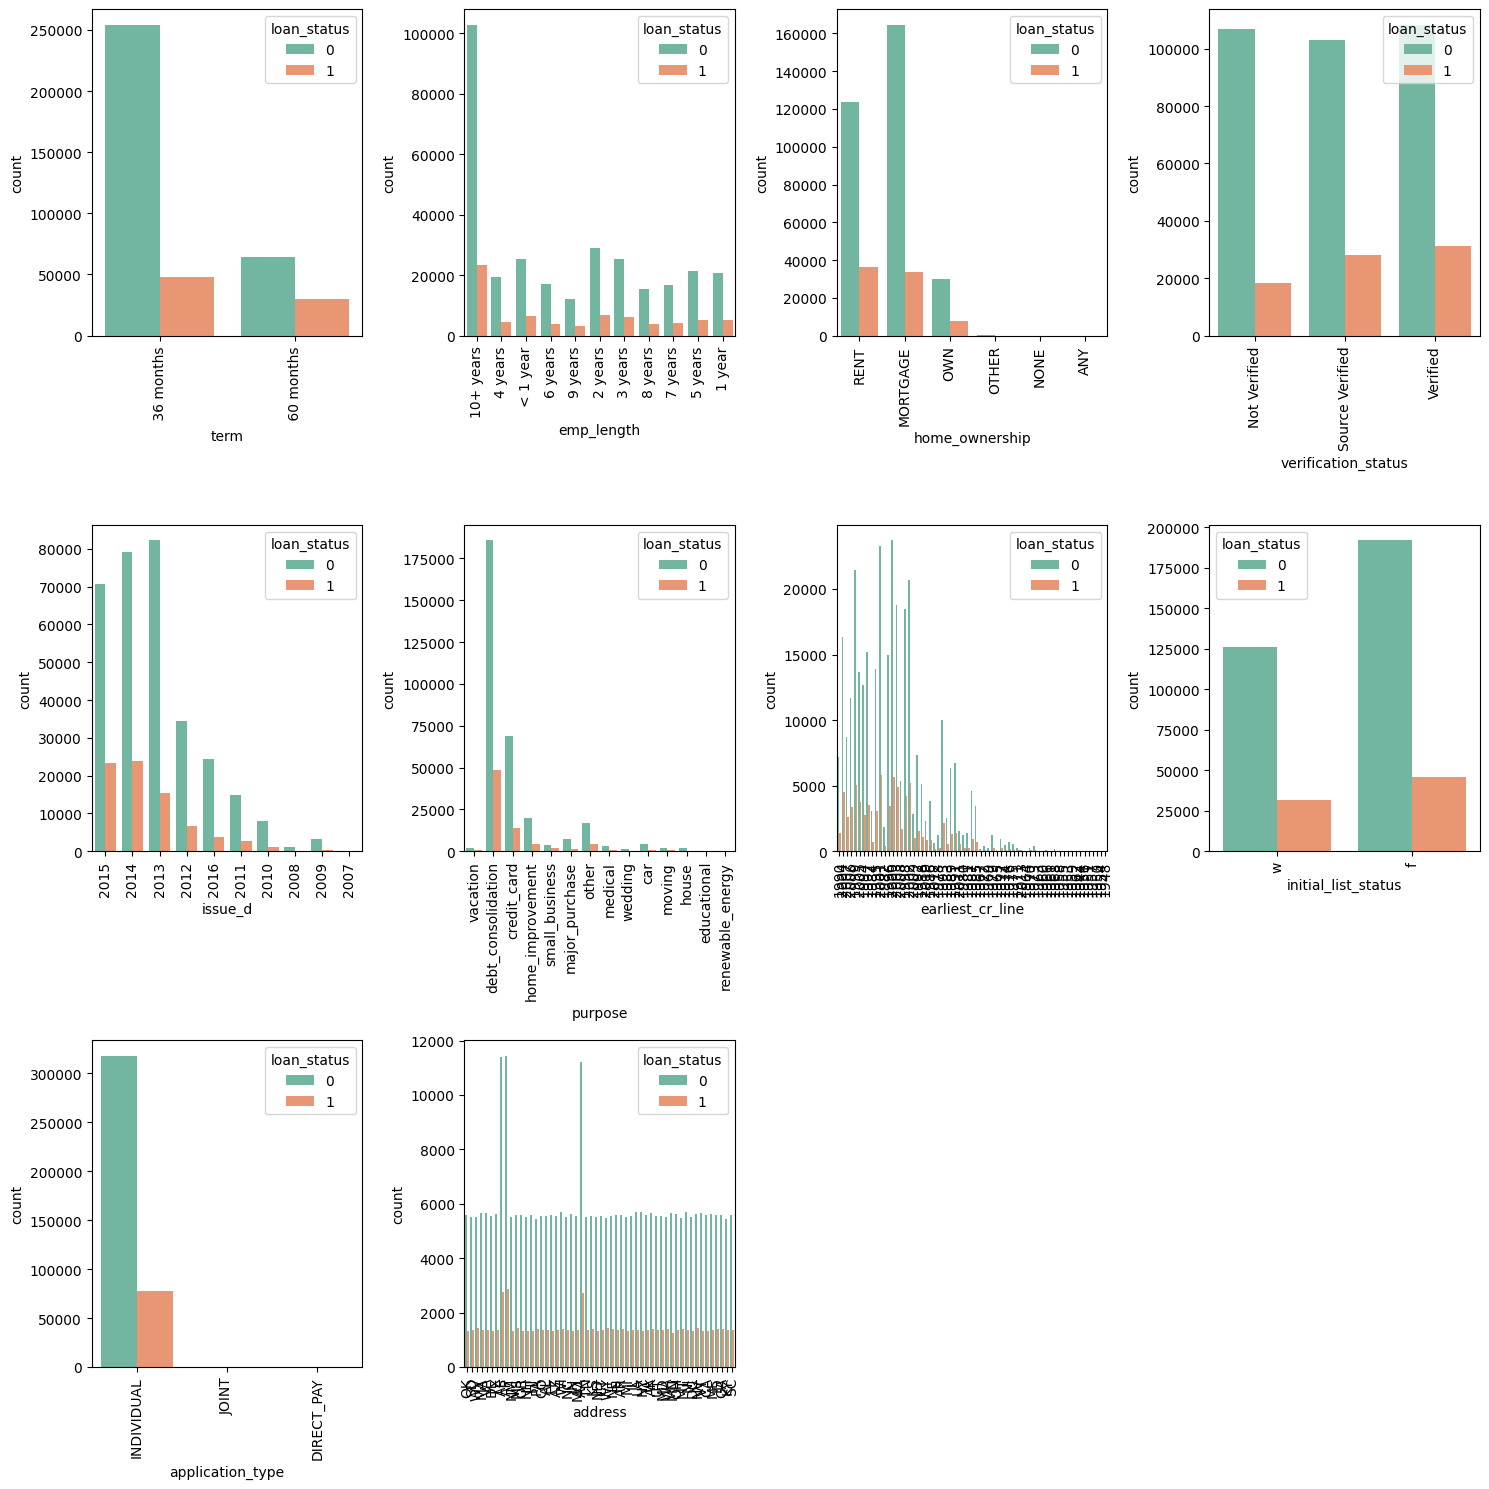

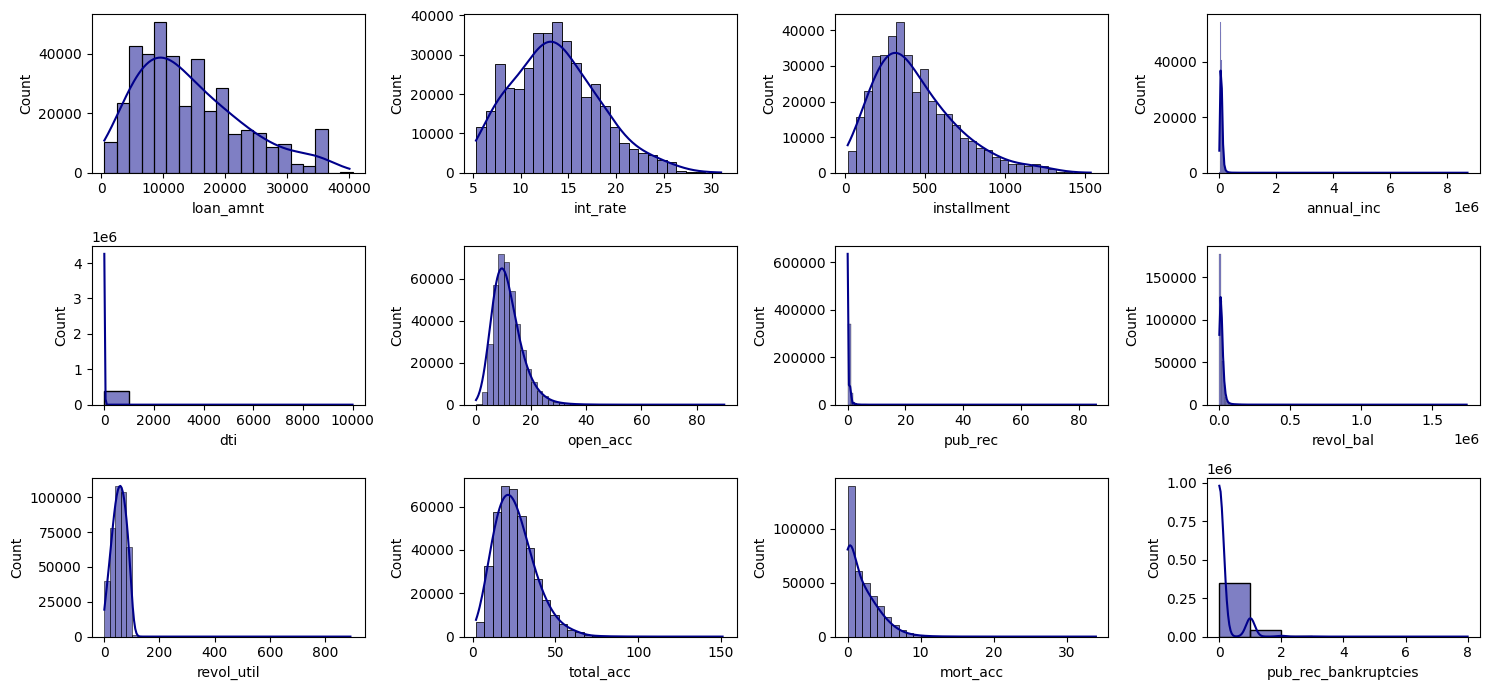

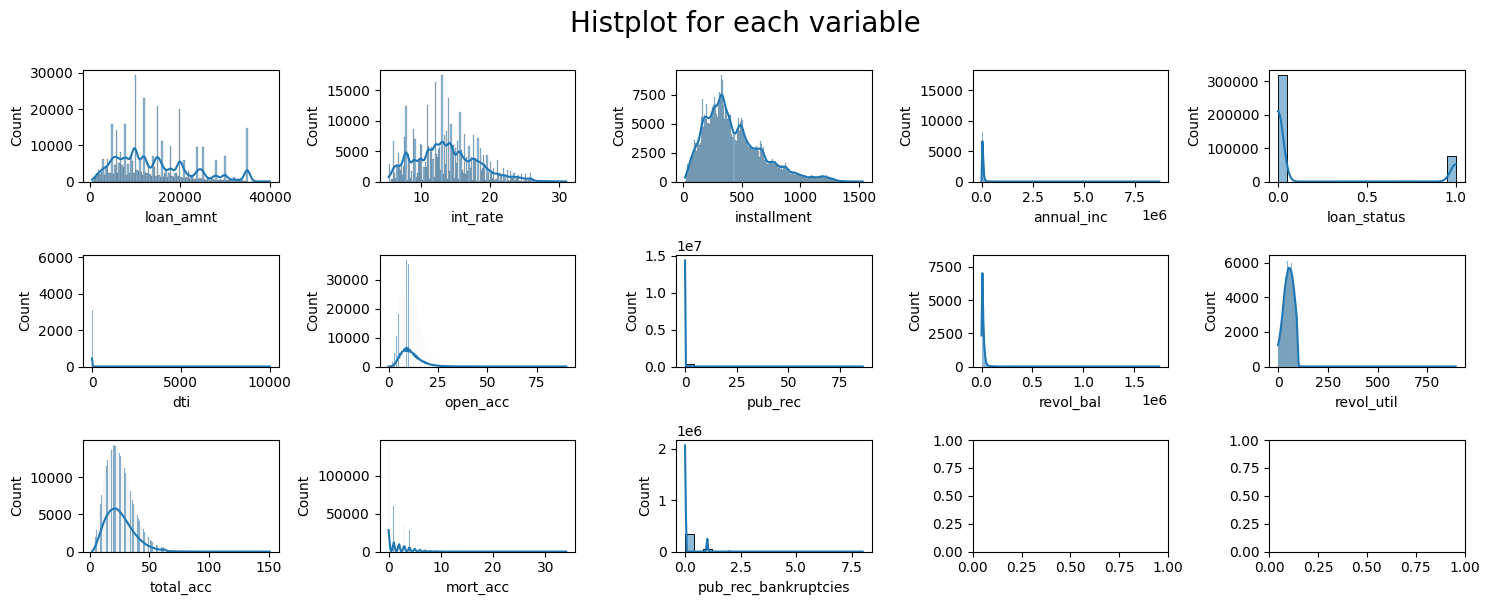

loan_amnt
# Adjusted p-values below 0.05:  45
int_rate
# Adjusted p-values below 0.05:  45
installment
# Adjusted p-values below 0.05:  43
annual_inc
# Adjusted p-values below 0.05:  35
loan_status
# Adjusted p-values below 0.05:  22
dti
# Adjusted p-values below 0.05:  43
open_acc
# Adjusted p-values below 0.05:  35
pub_rec
# Adjusted p-values below 0.05:  26
revol_bal
# Adjusted p-values below 0.05:  38
revol_util
# Adjusted p-values below 0.05:  42
total_acc
# Adjusted p-values below 0.05:  39
mort_acc


<string>:14: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
<string>:14: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
<string>:14: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
<string>:14: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
<string>:14: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.


# Adjusted p-values below 0.05:  35
pub_rec_bankruptcies


<string>:14: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.


In [3]:
#Run the Data Cleaning file and import the data with Macro variables
import Data_Cleaning_v3_macro as data_cleaned_macro

In [ ]:
#Define the datasets from the previously imported data
data = data_cleaned.data_final_scaled
data_macro = data_cleaned_macro.data_final_scaled

In [ ]:
#Define the train and test sets

tt_split = 0.2

#Dataset without Macro variables
train_set, test_set = train_test_split(data, test_size=tt_split, random_state=42)

#Dataset with Macro variables
train_set_macro, test_set_macro = train_test_split(data_macro, test_size=tt_split, random_state=42)

In [ ]:
#Check de ratio of the defaul and non-default
d_nd_ratio = ratio =len(train_set[train_set["remainder__loan_status"]==0])/len(train_set)
d_nd_ratio_macro =len(train_set_macro[train_set_macro["remainder__loan_status"]==0])/len(train_set_macro)

print(f"Probability of Payback in the whole datasets")
print(f"Without Macro:",d_nd_ratio)
print(f"With Macro variables:", d_nd_ratio_macro)

Probability of Payback in the whole datasets
Without Macro: 0.8041398509577903
With Macro variables: 0.8041398509577903


In [ ]:
#Defining the datasets

#Without Macro variables
Y_train = train_set["remainder__loan_status"]
X_train = train_set.drop("remainder__loan_status", axis=1)
Y_test = test_set["remainder__loan_status"]
X_test = test_set.drop("remainder__loan_status", axis=1)

#With Macro variables
Y_train_macro = train_set_macro["remainder__loan_status"]
X_train_macro = train_set_macro.drop("remainder__loan_status", axis=1)
Y_test_macro = test_set_macro["remainder__loan_status"]
X_test_macro = test_set_macro.drop("remainder__loan_status", axis=1)

In [ ]:
#Balanced Datasets fot training

#50/50 Split
train_set_d = train_set[train_set["remainder__loan_status"] == 1].sample(len(train_set[train_set["remainder__loan_status"]==1]))
train_set_bal_nd = train_set[train_set["remainder__loan_status"] == 0].sample(len(train_set[train_set["remainder__loan_status"]==1]))
train_set_balanced = train_set_d.append(train_set_bal_nd)

Y_train_bal = train_set_balanced["remainder__loan_status"]
X_train_bal = train_set_balanced.drop("remainder__loan_status", axis=1)


train_set_d_macro = train_set_macro[train_set_macro["remainder__loan_status"] == 1].sample(len(train_set_macro[train_set_macro["remainder__loan_status"]==1]))
train_set_bal_nd_macro = train_set_macro[train_set_macro["remainder__loan_status"] == 0].sample(len(train_set_macro[train_set_macro["remainder__loan_status"]==1]))
train_set_balanced_macro = train_set_d_macro.append(train_set_bal_nd_macro)

Y_train_bal_macro = train_set_balanced_macro["remainder__loan_status"]
X_train_bal_macro = train_set_balanced_macro.drop("remainder__loan_status", axis=1)

In [ ]:
#Variable definition for the training of the Neural Network
dim = X_train.shape[1]
dim_macro= X_train_macro.shape[1]

batch_size = 100
epochs = 5
lr=0.001

## Models

### Full Dataset

#### Basic Model

In [ ]:
#Basic Model 

Basic_model = keras.models.Sequential([
    #Input Layer (182 features)
    keras.layers.Dense(16, activation="relu", kernel_initializer='he_uniform', input_shape=(dim,)),
    keras.layers.Dense(10, activation="relu", kernel_initializer='he_uniform'),
    keras.layers.Dense(10, activation="relu", kernel_initializer='he_uniform'),
    keras.layers.Dense(1, activation="sigmoid") #1 neuron because binary
])

visualizer(Basic_model, file_name="Models/Basic Model", file_format="png", view=False)

Basic_model.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.Adam(learning_rate=lr),
              metrics=["accuracy"])


In [ ]:
#Fit the basic model and evaluate it on the whole dataset
Basic_history = Basic_model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, 
                validation_split=(0.2),
                shuffle=True)
print("Evaluation - Full Dataset")
Basic_model.evaluate(X_test, Y_test)


Epoch 1/10
2535/2535 [==============================] - 11s 3ms/step - loss: 0.4537 - accuracy: 0.8048 - val_loss: 0.4479 - val_accuracy: 0.8060
Epoch 2/10
2535/2535 [==============================] - 6s 2ms/step - loss: 0.4470 - accuracy: 0.8072 - val_loss: 0.4466 - val_accuracy: 0.8061
Epoch 3/10
2535/2535 [==============================] - 6s 2ms/step - loss: 0.4456 - accuracy: 0.8076 - val_loss: 0.4461 - val_accuracy: 0.8068
Epoch 4/10
2535/2535 [==============================] - 6s 2ms/step - loss: 0.4447 - accuracy: 0.8081 - val_loss: 0.4459 - val_accuracy: 0.8068
Epoch 5/10
2535/2535 [==============================] - 6s 2ms/step - loss: 0.4438 - accuracy: 0.8083 - val_loss: 0.4464 - val_accuracy: 0.8068
Epoch 6/10
2535/2535 [==============================] - 8s 3ms/step - loss: 0.4431 - accuracy: 0.8085 - val_loss: 0.4457 - val_accuracy: 0.8067
Epoch 7/10
2535/2535 [==============================] - 8s 3ms/step - loss: 0.4423 - accuracy: 0.8087 - val_loss: 0.4454 - val_accuracy

[0.4468882083892822, 0.8055197596549988]

In [ ]:
#Plot the learning curve
pd.DataFrame(Basic_history.history).plot(figsize=(8, 6))
plt.grid(True)
plt.xlabel("Epochs")
plt.title(f"Learning curve for the Basic Model - Initial Dataset")    
plt.show()

2476/2476 [==============================] - 4s 1ms/step


0.8055197838547585

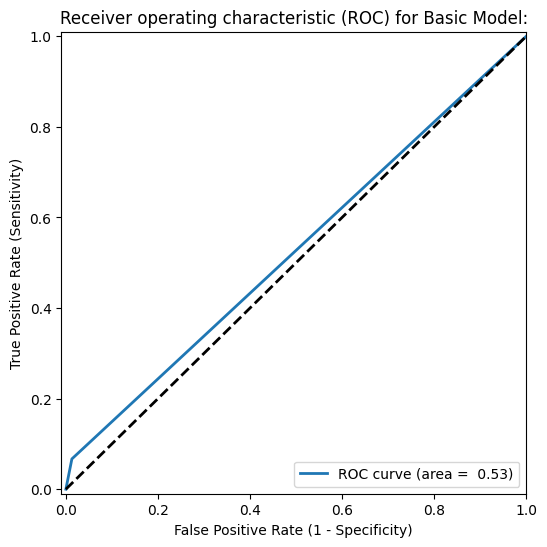

Classification report for the Basic Model
              precision    recall  f1-score   support

         0.0       0.81      0.99      0.89     63587
         1.0       0.56      0.07      0.12     15619

    accuracy                           0.81     79206
   macro avg       0.68      0.53      0.51     79206
weighted avg       0.76      0.81      0.74     79206



In [ ]:
#Confusion Matrix
y_pred = Basic_model.predict(X_test)
y_pred = (y_pred > 0.5) 
# Convert np array to Series
my_list = map(lambda x: x[0], y_pred)
y_pred = pd.Series(my_list)
# Convert True/False values back to 1 and 0s
y_prediction = y_pred.astype(int)

# Measuring Accuracy of our Model
cm = confusion_matrix(Y_test, y_prediction)
display(accuracy_score(Y_test, y_prediction))

# Assign confusion matrix values to variables 
TP = cm[1, 1] # True positives 
TN = cm[0, 0] # True negatives 
FP = cm[0, 1] # False positives
FN = cm[1, 0] # False negatives
sns.heatmap(cm, cmap="Blues", annot=True, fmt='g')
plt.title(f"Confusion Matrix for Basic Model - Initial Dataset")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show() # Display the figure for the current model

#Precision & Recall
precision, recall, threshold = precision_recall_curve(Y_test , y_prediction)
prec_recall_auc = auc(recall , precision)

#Plot Precision/Recall variations given different levels of thresholds 
plt.plot(recall , precision)
plt.xlabel("Recall") 
plt.ylabel("Precision") 
plt.ylim([0.0 , 1.05]) 
plt.xlim([0.0 , 1.0]) 
plt.title(f"2-class Precision-Recall curve for Basic Model: \n AUC={0:0.2f}".format(prec_recall_auc))
plt.show() # Display the figure for the current model

fpr, tpr, thresholds = roc_curve(Y_test, y_prediction)
roc_auc = auc(fpr , tpr)
plt.figure(figsize =(6, 6)) 
plt.plot(fpr, tpr , lw=2, label="ROC curve (area = {0: 0.2f})".format(roc_auc))
plt.plot([0, 1], [0, 1], lw=2, c = "k", linestyle="--") 
plt.xlim([-0.01, 1.0]) 
plt.ylim([-0.01, 1.01]) 
plt.xlabel("False Positive Rate (1 - Specificity)") 
plt.ylabel("True Positive Rate (Sensitivity)") 
plt.title(f"Receiver operating characteristic (ROC) for Basic Model:", fontsize=12)
plt.legend(loc="lower right")
plt.show() # Display the figure for the current model

# Classification Report
print("Classification report for the Basic Model")
print(classification_report(Y_test , y_prediction))

#### Complex Model

In [ ]:
#Complex Model
Complex_model = keras.models.Sequential([
    keras.layers.Dense(16, activation='relu',kernel_initializer='he_uniform', input_shape=(dim,)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(10, activation='relu', kernel_initializer='he_uniform',kernel_regularizer=keras.regularizers.L1L2(l1=1e-4, l2=1e-4)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation='relu', kernel_initializer='he_uniform',kernel_regularizer=keras.regularizers.L1L2(l1=1e-4, l2=1e-4)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(1, activation='sigmoid')
])

visualizer(Complex_model, file_name="Models/Complex_model", file_format="png", view=False)

Complex_model.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.Adam(learning_rate=lr),
              metrics=["accuracy"])

In [ ]:
#Fit the Complex model and evaluate it on the whole dataset
Complex_model_history = Complex_model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, 
                validation_split=(0.2),
                shuffle=True)
print("Evaluation - Full Dataset")
Basic_model.evaluate(X_test, Y_test)

Epoch 1/10
2535/2535 [==============================] - 14s 4ms/step - loss: 0.5042 - accuracy: 0.7896 - val_loss: 0.4612 - val_accuracy: 0.8036
Epoch 2/10
2535/2535 [==============================] - 10s 4ms/step - loss: 0.4640 - accuracy: 0.8045 - val_loss: 0.4558 - val_accuracy: 0.8033
Epoch 3/10
2535/2535 [==============================] - 10s 4ms/step - loss: 0.4576 - accuracy: 0.8052 - val_loss: 0.4514 - val_accuracy: 0.8050
Epoch 4/10
2535/2535 [==============================] - 10s 4ms/step - loss: 0.4542 - accuracy: 0.8053 - val_loss: 0.4500 - val_accuracy: 0.8048
Epoch 5/10
2535/2535 [==============================] - 10s 4ms/step - loss: 0.4522 - accuracy: 0.8055 - val_loss: 0.4493 - val_accuracy: 0.8040
Epoch 6/10
2535/2535 [==============================] - 10s 4ms/step - loss: 0.4513 - accuracy: 0.8055 - val_loss: 0.4482 - val_accuracy: 0.8046
Epoch 7/10
2535/2535 [==============================] - 10s 4ms/step - loss: 0.4503 - accuracy: 0.8062 - val_loss: 0.4482 - val_ac

[0.4468882083892822, 0.8055197596549988]

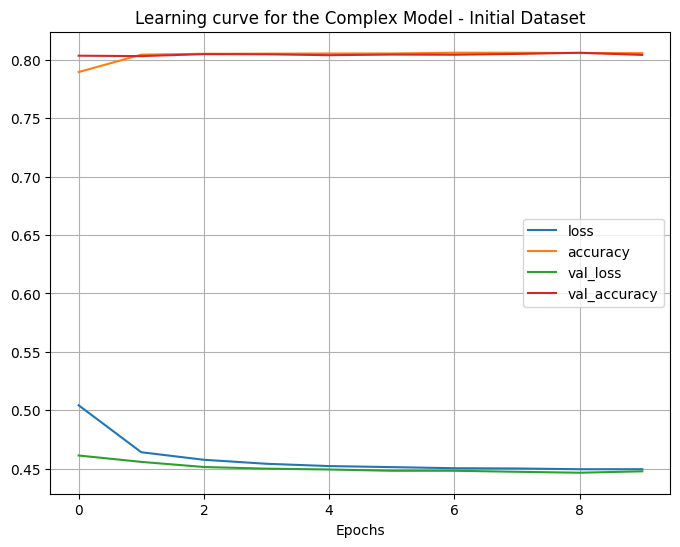

In [ ]:
#Plot the learning curve
pd.DataFrame(Complex_model_history.history).plot(figsize=(8, 6))
plt.grid(True)
plt.xlabel("Epochs")
plt.title(f"Learning curve for the Complex Model - Initial Dataset")    
plt.show()

2476/2476 [==============================] - 4s 2ms/step


0.8035881120117163

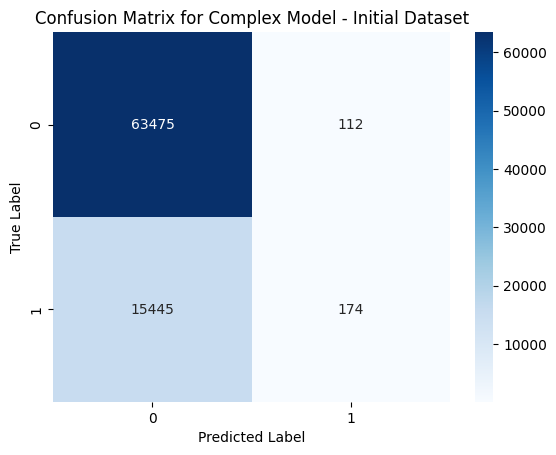

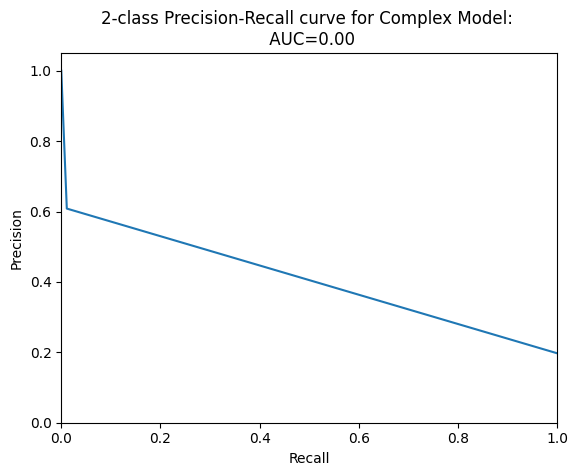

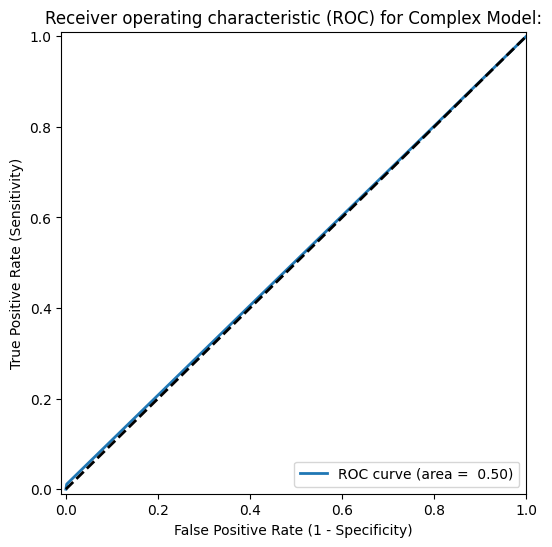

Classification report for the Complex Model
              precision    recall  f1-score   support

         0.0       0.80      1.00      0.89     63587
         1.0       0.61      0.01      0.02     15619

    accuracy                           0.80     79206
   macro avg       0.71      0.50      0.46     79206
weighted avg       0.77      0.80      0.72     79206



In [ ]:
#Confusion Matrix
y_pred = Complex_model.predict(X_test)
y_pred = (y_pred > 0.5) 
# Convert np array to Series
my_list = map(lambda x: x[0], y_pred)
y_pred = pd.Series(my_list)
# Convert True/False values back to 1 and 0s
y_prediction = y_pred.astype(int)

# Measuring Accuracy of our Model
cm = confusion_matrix(Y_test, y_prediction)
display(accuracy_score(Y_test, y_prediction))

# Assign confusion matrix values to variables 
TP = cm[1, 1] # True positives 
TN = cm[0, 0] # True negatives 
FP = cm[0, 1] # False positives
FN = cm[1, 0] # False negatives
sns.heatmap(cm, cmap="Blues", annot=True, fmt='g')
plt.title(f"Confusion Matrix for Complex Model - Initial Dataset")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show() # Display the figure for the current model

#Precision & Recall
precision, recall, threshold = precision_recall_curve(Y_test , y_prediction)
prec_recall_auc = auc(recall , precision)

#Plot Precision/Recall variations given different levels of thresholds 
plt.plot(recall , precision)
plt.xlabel("Recall") 
plt.ylabel("Precision") 
plt.ylim([0.0 , 1.05]) 
plt.xlim([0.0 , 1.0]) 
plt.title(f"2-class Precision-Recall curve for Complex Model: \n AUC={0:0.2f}".format(prec_recall_auc))
plt.show() # Display the figure for the current model

fpr, tpr, thresholds = roc_curve(Y_test, y_prediction)
roc_auc = auc(fpr , tpr)
plt.figure(figsize =(6, 6)) 
plt.plot(fpr, tpr , lw=2, label="ROC curve (area = {0: 0.2f})".format(roc_auc))
plt.plot([0, 1], [0, 1], lw=2, c = "k", linestyle="--") 
plt.xlim([-0.01, 1.0]) 
plt.ylim([-0.01, 1.01]) 
plt.xlabel("False Positive Rate (1 - Specificity)") 
plt.ylabel("True Positive Rate (Sensitivity)") 
plt.title(f"Receiver operating characteristic (ROC) for Complex Model:", fontsize=12)
plt.legend(loc="lower right")
plt.show() # Display the figure for the current model

# Classification Report
print("Classification report for the Complex Model")
print(classification_report(Y_test , y_prediction))

#### Complex Wide Model

In [ ]:
#Coplex Model with more neurons to make it wider
Complex_wide_model= keras.models.Sequential([
    keras.layers.Dense(256, activation='relu',kernel_initializer='he_uniform', input_shape=(dim,)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(128, activation='relu', kernel_initializer='he_uniform',kernel_regularizer=keras.regularizers.L1L2(l1=1e-4, l2=1e-4)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(64, activation='relu', kernel_initializer='he_uniform',kernel_regularizer=keras.regularizers.L1L2(l1=1e-4, l2=1e-4)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(32, activation='relu', kernel_initializer='he_uniform',kernel_regularizer=keras.regularizers.L1L2(l1=1e-4, l2=1e-4)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(1, activation='sigmoid')
])

visualizer(Complex_wide_model, file_name="Models/Complex wide model", file_format="png", view=False)

Complex_wide_model.compile(loss="binary_crossentropy",
                           optimizer=keras.optimizers.Adam(learning_rate=lr),
                           metrics=["accuracy"])

In [ ]:
#Fit the Complex wide model and evaluate it on the whole dataset
Complex_wide_model_history = Complex_wide_model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, 
                                                    validation_split=(0.2),
                                                    shuffle=True)
print("Evaluation - Full Dataset")
Basic_model.evaluate(X_test, Y_test)

Epoch 1/10
2535/2535 [==============================] - 31s 9ms/step - loss: 0.7315 - accuracy: 0.7924 - val_loss: 0.5447 - val_accuracy: 0.8056
Epoch 2/10
2535/2535 [==============================] - 22s 9ms/step - loss: 0.5005 - accuracy: 0.8052 - val_loss: 0.4800 - val_accuracy: 0.8053
Epoch 3/10
2535/2535 [==============================] - 23s 9ms/step - loss: 0.4752 - accuracy: 0.8054 - val_loss: 0.4680 - val_accuracy: 0.8066
Epoch 4/10
2535/2535 [==============================] - 26s 10ms/step - loss: 0.4701 - accuracy: 0.8060 - val_loss: 0.4690 - val_accuracy: 0.8044
Epoch 5/10
2535/2535 [==============================] - 27s 11ms/step - loss: 0.4673 - accuracy: 0.8064 - val_loss: 0.4667 - val_accuracy: 0.8041
Epoch 6/10
2535/2535 [==============================] - 24s 9ms/step - loss: 0.4654 - accuracy: 0.8066 - val_loss: 0.4640 - val_accuracy: 0.8063
Epoch 7/10
2535/2535 [==============================] - 23s 9ms/step - loss: 0.4645 - accuracy: 0.8065 - val_loss: 0.4646 - val_

[0.4468882083892822, 0.8055197596549988]

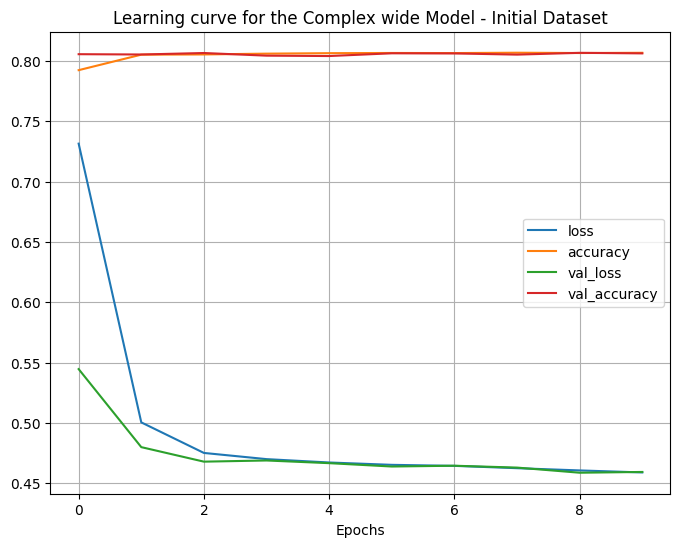

In [ ]:
#Plot the learning curve
pd.DataFrame(Complex_wide_model_history.history).plot(figsize=(8, 6))
plt.grid(True)
plt.xlabel("Epochs")
plt.title(f"Learning curve for the Complex wide Model - Initial Dataset")    
plt.show()

2476/2476 [==============================] - 6s 2ms/step


0.805885917733505

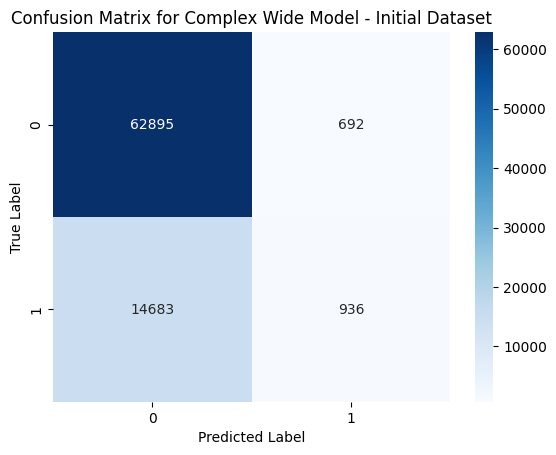

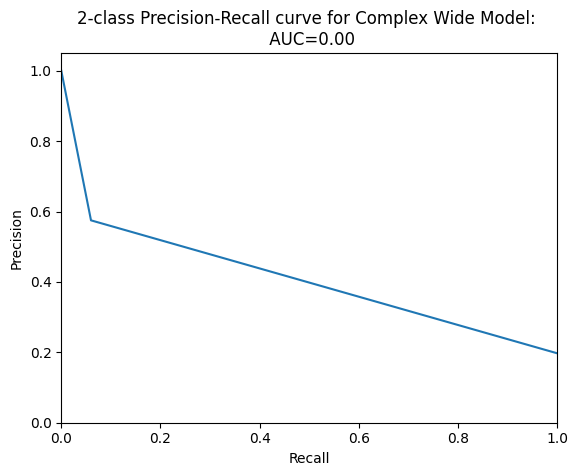

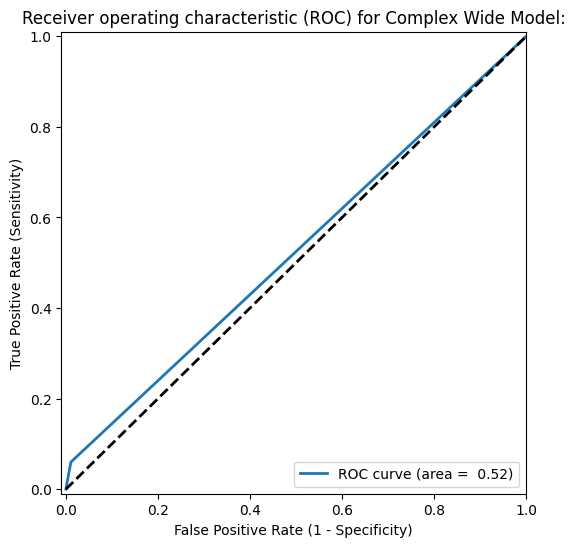

Classification report for the Complex Wide Model
              precision    recall  f1-score   support

         0.0       0.81      0.99      0.89     63587
         1.0       0.57      0.06      0.11     15619

    accuracy                           0.81     79206
   macro avg       0.69      0.52      0.50     79206
weighted avg       0.76      0.81      0.74     79206



In [ ]:
#Confusion Matrix
y_pred = Complex_wide_model.predict(X_test)
y_pred = (y_pred > 0.5) 
# Convert np array to Series
my_list = map(lambda x: x[0], y_pred)
y_pred = pd.Series(my_list)
# Convert True/False values back to 1 and 0s
y_prediction = y_pred.astype(int)

# Measuring Accuracy of our Model
cm = confusion_matrix(Y_test, y_prediction)
display(accuracy_score(Y_test, y_prediction))

# Assign confusion matrix values to variables 
TP = cm[1, 1] # True positives 
TN = cm[0, 0] # True negatives 
FP = cm[0, 1] # False positives
FN = cm[1, 0] # False negatives
sns.heatmap(cm, cmap="Blues", annot=True, fmt='g')
plt.title(f"Confusion Matrix for Complex Wide Model - Initial Dataset")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show() # Display the figure for the current model

#Precision & Recall
precision, recall, threshold = precision_recall_curve(Y_test , y_prediction)
prec_recall_auc = auc(recall , precision)

#Plot Precision/Recall variations given different levels of thresholds 
plt.plot(recall , precision)
plt.xlabel("Recall") 
plt.ylabel("Precision") 
plt.ylim([0.0 , 1.05]) 
plt.xlim([0.0 , 1.0]) 
plt.title(f"2-class Precision-Recall curve for Complex Wide Model: \n AUC={0:0.2f}".format(prec_recall_auc))
plt.show() # Display the figure for the current model

fpr, tpr, thresholds = roc_curve(Y_test, y_prediction)
roc_auc = auc(fpr , tpr)
plt.figure(figsize =(6, 6)) 
plt.plot(fpr, tpr , lw=2, label="ROC curve (area = {0: 0.2f})".format(roc_auc))
plt.plot([0, 1], [0, 1], lw=2, c = "k", linestyle="--") 
plt.xlim([-0.01, 1.0]) 
plt.ylim([-0.01, 1.01]) 
plt.xlabel("False Positive Rate (1 - Specificity)") 
plt.ylabel("True Positive Rate (Sensitivity)") 
plt.title(f"Receiver operating characteristic (ROC) for Complex Wide Model:", fontsize=12)
plt.legend(loc="lower right")
plt.show() # Display the figure for the current model

# Classification Report
print("Classification report for the Complex Wide Model")
print(classification_report(Y_test , y_prediction))

#### Split model

In [ ]:
# define left and right branches
left_branch = keras.models.Sequential()
left_branch.add(keras.layers.Dense(4, activation='relu', input_dim=dim))
right_branch = keras.models.Sequential()
right_branch.add(keras.layers.Dense(4, activation='relu', input_dim=dim))

# concatenate the outputs of the two branches
input_layer = keras.layers.Input(shape=(dim,))
merged = keras.layers.Concatenate(axis=1)([left_branch(input_layer), right_branch(input_layer)])

# define the rest of the model
output_layer = keras.layers.Dense(1, activation='sigmoid')(merged)
Branched_model = keras.models.Model(inputs=[input_layer], outputs=[output_layer])

# visualize the model
visualizer(Branched_model, file_name="Models/Branched Model", file_format="png", view=False)

Branched_model.compile(loss="binary_crossentropy",
                       optimizer=keras.optimizers.Adam(learning_rate=lr),
                       metrics=["accuracy"])


In [ ]:
#Fit the Complex wide model and evaluate it on the whole dataset
Branched_model_history = Branched_model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs,
                                            validation_split=(0.2),
                                            shuffle=True)
print("Evaluation - Full Dataset")
Basic_model.evaluate(X_test, Y_test)

Epoch 1/10
2535/2535 [==============================] - 9s 3ms/step - loss: 0.4588 - accuracy: 0.8031 - val_loss: 0.4486 - val_accuracy: 0.8032
Epoch 2/10
2535/2535 [==============================] - 7s 3ms/step - loss: 0.4476 - accuracy: 0.8058 - val_loss: 0.4477 - val_accuracy: 0.8057
Epoch 3/10
2535/2535 [==============================] - 7s 3ms/step - loss: 0.4466 - accuracy: 0.8073 - val_loss: 0.4480 - val_accuracy: 0.8059
Epoch 4/10
2535/2535 [==============================] - 7s 3ms/step - loss: 0.4457 - accuracy: 0.8079 - val_loss: 0.4481 - val_accuracy: 0.8062
Epoch 5/10
2535/2535 [==============================] - 7s 3ms/step - loss: 0.4450 - accuracy: 0.8080 - val_loss: 0.4470 - val_accuracy: 0.8065
Epoch 6/10
2535/2535 [==============================] - 8s 3ms/step - loss: 0.4446 - accuracy: 0.8080 - val_loss: 0.4469 - val_accuracy: 0.8065
Epoch 7/10
2535/2535 [==============================] - 9s 3ms/step - loss: 0.4441 - accuracy: 0.8081 - val_loss: 0.4464 - val_accuracy:

[0.4468882083892822, 0.8055197596549988]

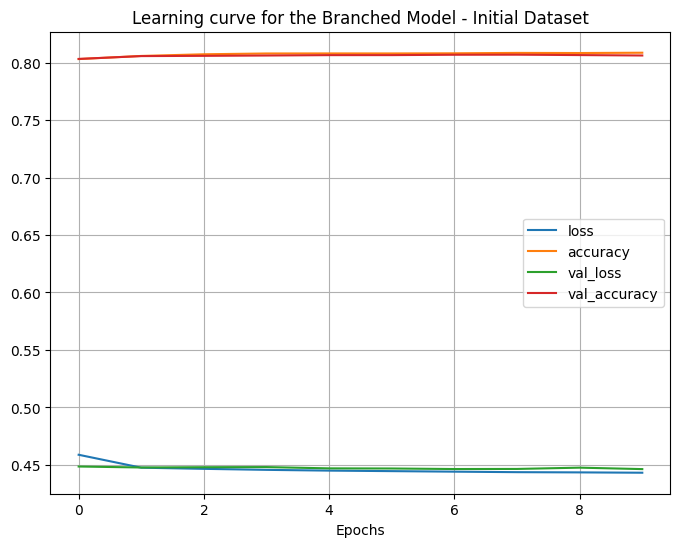

In [ ]:
#Plot the learning curve
pd.DataFrame(Branched_model_history.history).plot(figsize=(8, 6))
plt.grid(True)
plt.xlabel("Epochs")
plt.title(f"Learning curve for the Branched Model - Initial Dataset")    
plt.show()

2476/2476 [==============================] - 4s 1ms/step


0.8060500467136328

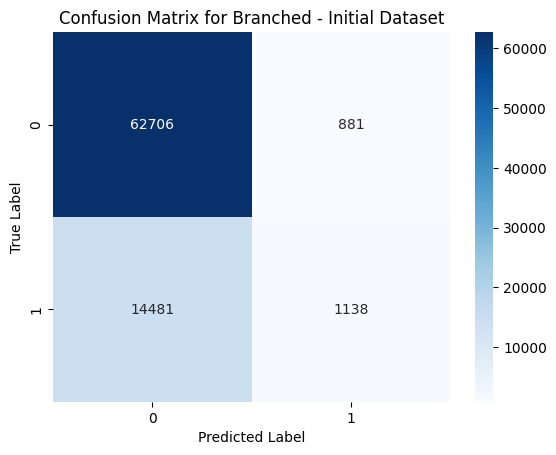

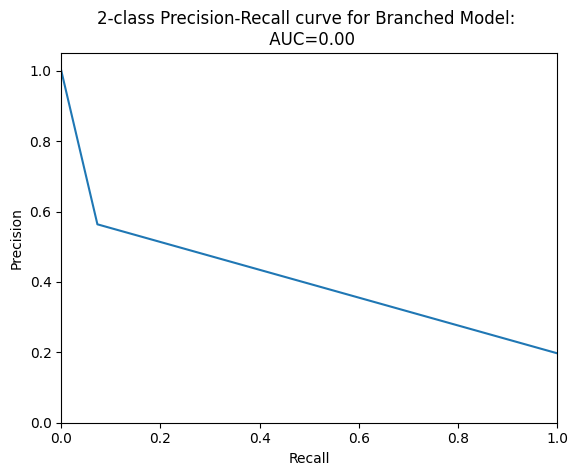

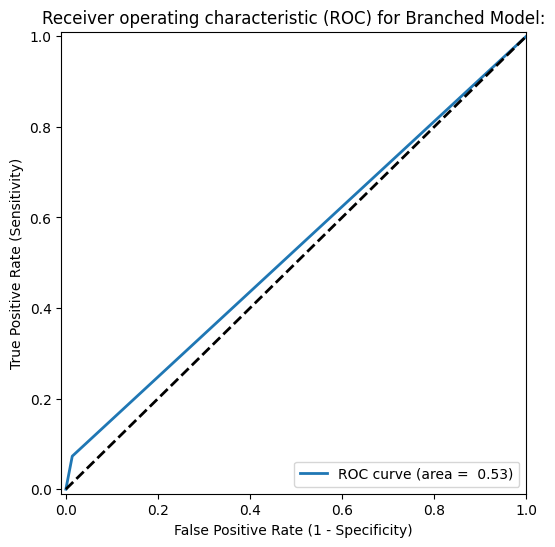

Classification report for the Branched Model
              precision    recall  f1-score   support

         0.0       0.81      0.99      0.89     63587
         1.0       0.56      0.07      0.13     15619

    accuracy                           0.81     79206
   macro avg       0.69      0.53      0.51     79206
weighted avg       0.76      0.81      0.74     79206



In [ ]:
#Confusion Matrix
y_pred = Branched_model.predict(X_test)
y_pred = (y_pred > 0.5) 
# Convert np array to Series
my_list = map(lambda x: x[0], y_pred)
y_pred = pd.Series(my_list)
# Convert True/False values back to 1 and 0s
y_prediction = y_pred.astype(int)

# Measuring Accuracy of our Model
cm = confusion_matrix(Y_test, y_prediction)
display(accuracy_score(Y_test, y_prediction))

# Assign confusion matrix values to variables 
TP = cm[1, 1] # True positives 
TN = cm[0, 0] # True negatives 
FP = cm[0, 1] # False positives
FN = cm[1, 0] # False negatives
sns.heatmap(cm, cmap="Blues", annot=True, fmt='g')
plt.title(f"Confusion Matrix for Branched - Initial Dataset")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show() # Display the figure for the current model

#Precision & Recall
precision, recall, threshold = precision_recall_curve(Y_test , y_prediction)
prec_recall_auc = auc(recall , precision)

#Plot Precision/Recall variations given different levels of thresholds 
plt.plot(recall , precision)
plt.xlabel("Recall") 
plt.ylabel("Precision") 
plt.ylim([0.0 , 1.05]) 
plt.xlim([0.0 , 1.0]) 
plt.title(f"2-class Precision-Recall curve for Branched Model: \n AUC={0:0.2f}".format(prec_recall_auc))
plt.show() # Display the figure for the current model

fpr, tpr, thresholds = roc_curve(Y_test, y_prediction)
roc_auc = auc(fpr , tpr)
plt.figure(figsize =(6, 6)) 
plt.plot(fpr, tpr , lw=2, label="ROC curve (area = {0: 0.2f})".format(roc_auc))
plt.plot([0, 1], [0, 1], lw=2, c = "k", linestyle="--") 
plt.xlim([-0.01, 1.0]) 
plt.ylim([-0.01, 1.01]) 
plt.xlabel("False Positive Rate (1 - Specificity)") 
plt.ylabel("True Positive Rate (Sensitivity)") 
plt.title(f"Receiver operating characteristic (ROC) for Branched Model:", fontsize=12)
plt.legend(loc="lower right")
plt.show() # Display the figure for the current model

# Classification Report
print("Classification report for the Branched Model")
print(classification_report(Y_test , y_prediction))

### Balanced Dataset

#### Basic Model

In [ ]:
#Basic Model 

Basic_model_bal = keras.models.Sequential([
    #Input Layer (182 features)
    keras.layers.Dense(16, activation="relu", kernel_initializer='he_uniform', input_shape=(dim,)),
    keras.layers.Dense(10, activation="relu", kernel_initializer='he_uniform'),
    keras.layers.Dense(10, activation="relu", kernel_initializer='he_uniform'),
    keras.layers.Dense(1, activation="sigmoid") #1 neuron because binary
])

visualizer(Basic_model, file_name="Models/Basic Model", file_format="png", view=False)

Basic_model_bal.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.Adam(learning_rate=lr),
              metrics=["accuracy"])

In [ ]:
#Fit the basic model and evaluate it on the whole dataset
Basic_history_bal = Basic_model_bal.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, 
                validation_split=(0.2),
                shuffle=True)
print("Evaluation - Full Dataset")
Basic_model.evaluate(X_test, Y_test)


Epoch 1/10
2535/2535 [==============================] - 10s 3ms/step - loss: 0.4561 - accuracy: 0.8058 - val_loss: 0.4512 - val_accuracy: 0.8049
Epoch 2/10
2535/2535 [==============================] - 8s 3ms/step - loss: 0.4477 - accuracy: 0.8072 - val_loss: 0.4474 - val_accuracy: 0.8063
Epoch 3/10
2535/2535 [==============================] - 9s 4ms/step - loss: 0.4464 - accuracy: 0.8074 - val_loss: 0.4473 - val_accuracy: 0.8062
Epoch 4/10
2535/2535 [==============================] - 8s 3ms/step - loss: 0.4455 - accuracy: 0.8078 - val_loss: 0.4462 - val_accuracy: 0.8066
Epoch 5/10
2535/2535 [==============================] - 8s 3ms/step - loss: 0.4446 - accuracy: 0.8083 - val_loss: 0.4462 - val_accuracy: 0.8059
Epoch 6/10
2535/2535 [==============================] - 8s 3ms/step - loss: 0.4439 - accuracy: 0.8084 - val_loss: 0.4466 - val_accuracy: 0.8058
Epoch 7/10
2535/2535 [==============================] - 8s 3ms/step - loss: 0.4431 - accuracy: 0.8087 - val_loss: 0.4473 - val_accuracy

[0.4468882083892822, 0.8055197596549988]

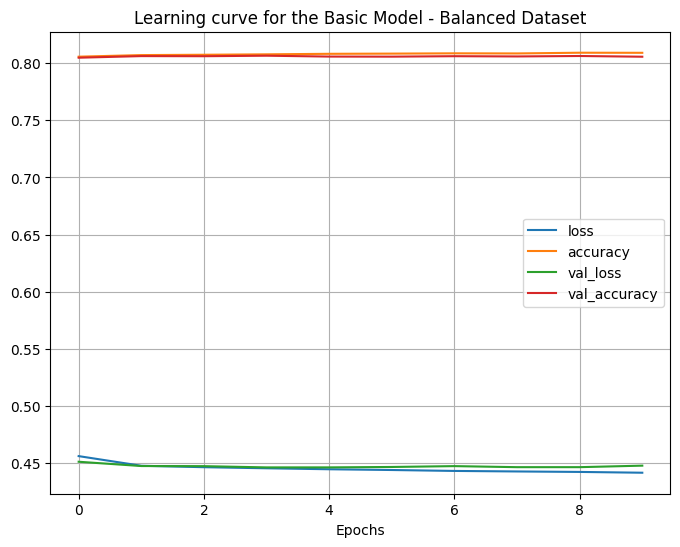

In [ ]:
#Plot the learning curve
pd.DataFrame(Basic_history_bal.history).plot(figsize=(8, 6))
plt.grid(True)
plt.xlabel("Epochs")
plt.title(f"Learning curve for the Basic Model - Balanced Dataset")    
plt.show()

2476/2476 [==============================] - 5s 2ms/step


0.8061131732444512

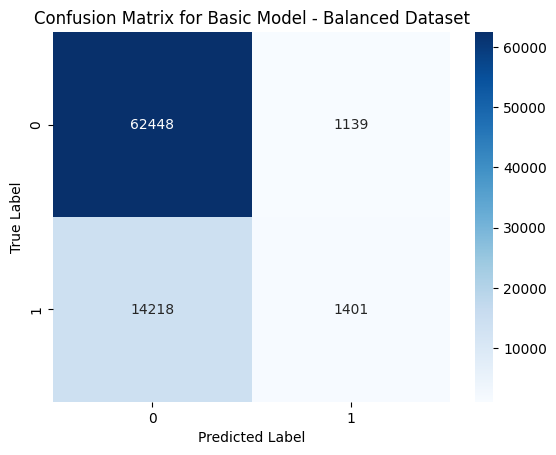

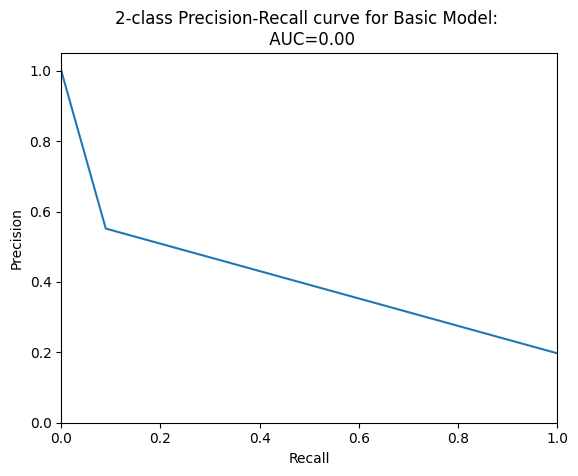

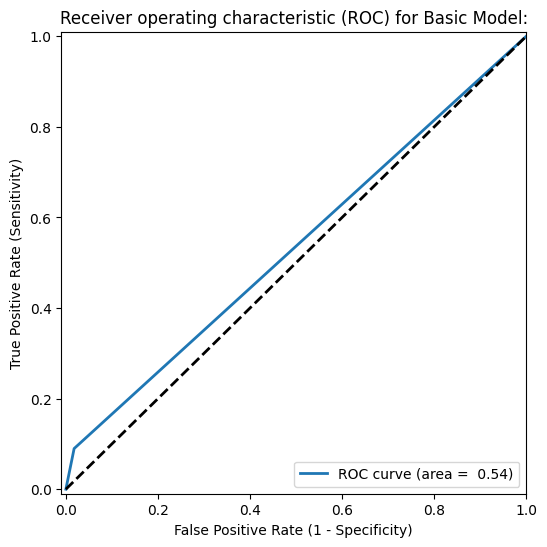

Classification report for the Basic Model - Balanced Dataset
              precision    recall  f1-score   support

         0.0       0.81      0.98      0.89     63587
         1.0       0.55      0.09      0.15     15619

    accuracy                           0.81     79206
   macro avg       0.68      0.54      0.52     79206
weighted avg       0.76      0.81      0.75     79206



In [ ]:
#Confusion Matrix
y_pred = Basic_model_bal.predict(X_test)
y_pred = (y_pred > 0.5) 
# Convert np array to Series
my_list = map(lambda x: x[0], y_pred)
y_pred = pd.Series(my_list)
# Convert True/False values back to 1 and 0s
y_prediction = y_pred.astype(int)

# Measuring Accuracy of our Model
cm = confusion_matrix(Y_test, y_prediction)
display(accuracy_score(Y_test, y_prediction))

# Assign confusion matrix values to variables 
TP = cm[1, 1] # True positives 
TN = cm[0, 0] # True negatives 
FP = cm[0, 1] # False positives
FN = cm[1, 0] # False negatives
sns.heatmap(cm, cmap="Blues", annot=True, fmt='g')
plt.title(f"Confusion Matrix for Basic Model - Balanced Dataset")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show() # Display the figure for the current model

#Precision & Recall
precision, recall, threshold = precision_recall_curve(Y_test , y_prediction)
prec_recall_auc = auc(recall , precision)

#Plot Precision/Recall variations given different levels of thresholds 
plt.plot(recall , precision)
plt.xlabel("Recall") 
plt.ylabel("Precision") 
plt.ylim([0.0 , 1.05]) 
plt.xlim([0.0 , 1.0]) 
plt.title(f"2-class Precision-Recall curve for Basic Model: \n AUC={0:0.2f}".format(prec_recall_auc))
plt.show() # Display the figure for the current model

fpr, tpr, thresholds = roc_curve(Y_test, y_prediction)
roc_auc = auc(fpr , tpr)
plt.figure(figsize =(6, 6)) 
plt.plot(fpr, tpr , lw=2, label="ROC curve (area = {0: 0.2f})".format(roc_auc))
plt.plot([0, 1], [0, 1], lw=2, c = "k", linestyle="--") 
plt.xlim([-0.01, 1.0]) 
plt.ylim([-0.01, 1.01]) 
plt.xlabel("False Positive Rate (1 - Specificity)") 
plt.ylabel("True Positive Rate (Sensitivity)") 
plt.title(f"Receiver operating characteristic (ROC) for Basic Model:", fontsize=12)
plt.legend(loc="lower right")
plt.show() # Display the figure for the current model

# Classification Report
print("Classification report for the Basic Model - Balanced Dataset")
print(classification_report(Y_test , y_prediction))

#### Complex Model

In [ ]:
#Complex Model
Complex_model_bal = keras.models.Sequential([
    keras.layers.Dense(16, activation='relu',kernel_initializer='he_uniform', input_shape=(dim,)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(10, activation='relu', kernel_initializer='he_uniform',kernel_regularizer=keras.regularizers.L1L2(l1=1e-4, l2=1e-4)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation='relu', kernel_initializer='he_uniform',kernel_regularizer=keras.regularizers.L1L2(l1=1e-4, l2=1e-4)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(1, activation='sigmoid')
])

Complex_model_bal.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.Adam(learning_rate=lr),
              metrics=["accuracy"])

In [ ]:
#Fit the Complex model and evaluate it on the whole dataset
Complex_model_bal_history = Complex_model.fit(X_train_bal, Y_train_bal, batch_size=batch_size, epochs=epochs, 
                validation_split=(0.2),
                shuffle=True)
print("Evaluation - Full Dataset")
Basic_model.evaluate(X_test, Y_test)

Epoch 1/10
993/993 [==============================] - 5s 5ms/step - loss: 0.6429 - accuracy: 0.6288 - val_loss: 0.8343 - val_accuracy: 0.4736
Epoch 2/10
993/993 [==============================] - 5s 5ms/step - loss: 0.5964 - accuracy: 0.6833 - val_loss: 0.8628 - val_accuracy: 0.4251
Epoch 3/10
993/993 [==============================] - 5s 5ms/step - loss: 0.5946 - accuracy: 0.6855 - val_loss: 0.8250 - val_accuracy: 0.4737
Epoch 4/10
993/993 [==============================] - 5s 5ms/step - loss: 0.5931 - accuracy: 0.6868 - val_loss: 0.8503 - val_accuracy: 0.4513
Epoch 5/10
993/993 [==============================] - 5s 5ms/step - loss: 0.5937 - accuracy: 0.6845 - val_loss: 0.8580 - val_accuracy: 0.4288
Epoch 6/10
993/993 [==============================] - 5s 5ms/step - loss: 0.5935 - accuracy: 0.6862 - val_loss: 0.8336 - val_accuracy: 0.4453
Epoch 7/10
993/993 [==============================] - 4s 4ms/step - loss: 0.5933 - accuracy: 0.6846 - val_loss: 0.8741 - val_accuracy: 0.4175
Epoch 

[0.4468882083892822, 0.8055197596549988]

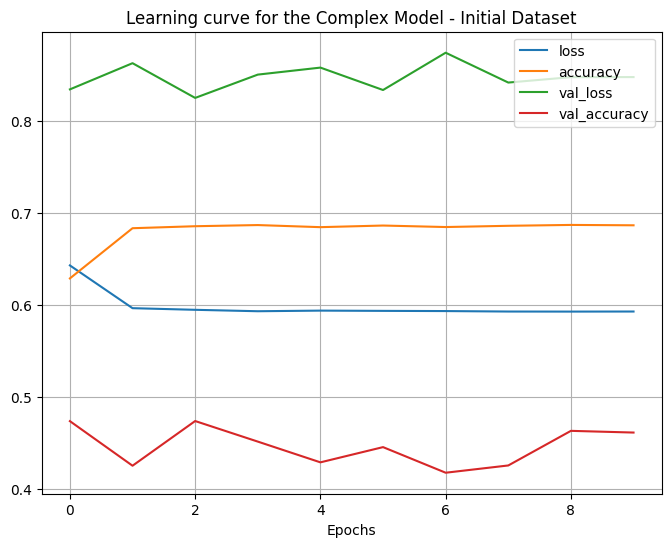

In [ ]:
#Plot the learning curve
pd.DataFrame(Complex_model_bal_history.history).plot(figsize=(8, 6))
plt.grid(True)
plt.xlabel("Epochs")
plt.title(f"Learning curve for the Complex Model - Initial Dataset")    
plt.show()

2476/2476 [==============================] - 6s 2ms/step


0.4009923490644648

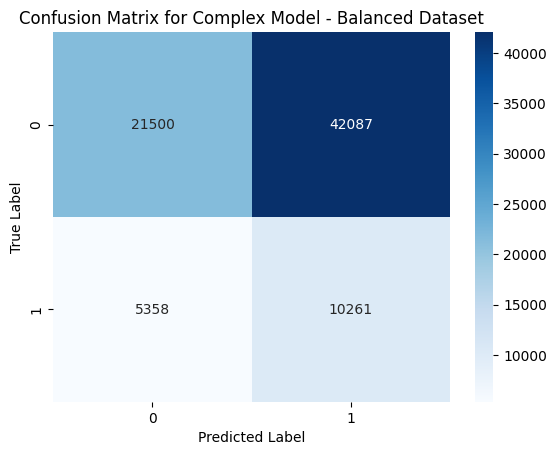

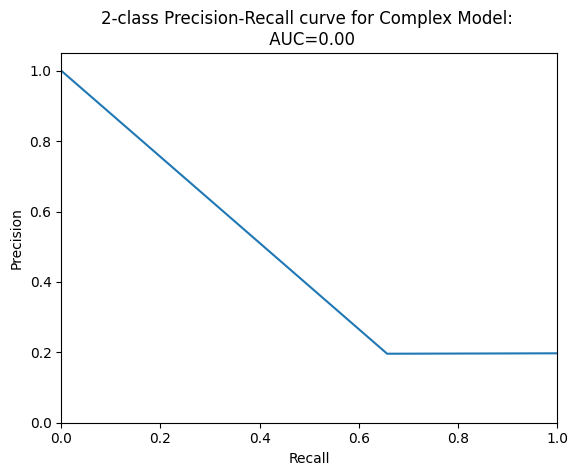

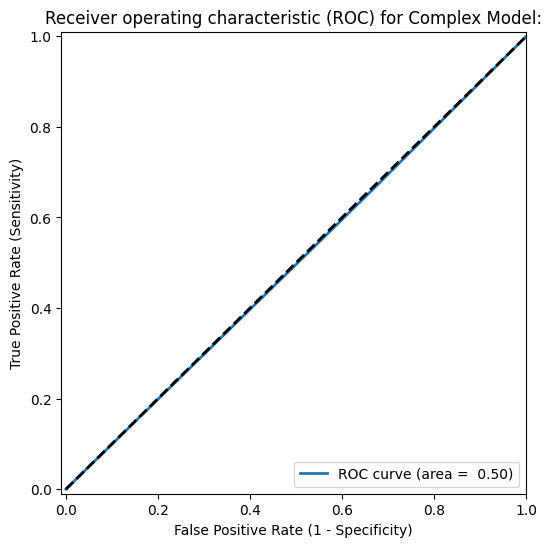

Classification report for the Complex Model
              precision    recall  f1-score   support

         0.0       0.80      0.34      0.48     63587
         1.0       0.20      0.66      0.30     15619

    accuracy                           0.40     79206
   macro avg       0.50      0.50      0.39     79206
weighted avg       0.68      0.40      0.44     79206



In [ ]:
#Confusion Matrix
y_pred = Complex_model_bal.predict(X_test)
y_pred = (y_pred > 0.5) 
# Convert np array to Series
my_list = map(lambda x: x[0], y_pred)
y_pred = pd.Series(my_list)
# Convert True/False values back to 1 and 0s
y_prediction = y_pred.astype(int)

# Measuring Accuracy of our Model
cm = confusion_matrix(Y_test, y_prediction)
display(accuracy_score(Y_test, y_prediction))

# Assign confusion matrix values to variables 
TP = cm[1, 1] # True positives 
TN = cm[0, 0] # True negatives 
FP = cm[0, 1] # False positives
FN = cm[1, 0] # False negatives
sns.heatmap(cm, cmap="Blues", annot=True, fmt='g')
plt.title(f"Confusion Matrix for Complex Model - Balanced Dataset")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show() # Display the figure for the current model

#Precision & Recall
precision, recall, threshold = precision_recall_curve(Y_test , y_prediction)
prec_recall_auc = auc(recall , precision)

#Plot Precision/Recall variations given different levels of thresholds 
plt.plot(recall , precision)
plt.xlabel("Recall") 
plt.ylabel("Precision") 
plt.ylim([0.0 , 1.05]) 
plt.xlim([0.0 , 1.0]) 
plt.title(f"2-class Precision-Recall curve for Complex Model: \n AUC={0:0.2f}".format(prec_recall_auc))
plt.show() # Display the figure for the current model

fpr, tpr, thresholds = roc_curve(Y_test, y_prediction)
roc_auc = auc(fpr , tpr)
plt.figure(figsize =(6, 6)) 
plt.plot(fpr, tpr , lw=2, label="ROC curve (area = {0: 0.2f})".format(roc_auc))
plt.plot([0, 1], [0, 1], lw=2, c = "k", linestyle="--") 
plt.xlim([-0.01, 1.0]) 
plt.ylim([-0.01, 1.01]) 
plt.xlabel("False Positive Rate (1 - Specificity)") 
plt.ylabel("True Positive Rate (Sensitivity)") 
plt.title(f"Receiver operating characteristic (ROC) for Complex Model:", fontsize=12)
plt.legend(loc="lower right")
plt.show() # Display the figure for the current model

# Classification Report
print("Classification report for the Complex Model")
print(classification_report(Y_test , y_prediction))

#### Complex Wide Model

In [ ]:
#Coplex Model with more neurons to make it wider
Complex_wide_model_bal= keras.models.Sequential([
    keras.layers.Dense(256, activation='relu',kernel_initializer='he_uniform', input_shape=(dim_macro,)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(128, activation='relu', kernel_initializer='he_uniform',kernel_regularizer=keras.regularizers.L1L2(l1=1e-4, l2=1e-4)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(64, activation='relu', kernel_initializer='he_uniform',kernel_regularizer=keras.regularizers.L1L2(l1=1e-4, l2=1e-4)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(32, activation='relu', kernel_initializer='he_uniform',kernel_regularizer=keras.regularizers.L1L2(l1=1e-4, l2=1e-4)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(1, activation='sigmoid')
])

Complex_wide_model_bal.compile(loss="binary_crossentropy",
                           optimizer=keras.optimizers.Adam(learning_rate=lr),
                           metrics=["accuracy"])

In [ ]:
#Fit the Complex wide model and evaluate it on the whole dataset
Complex_wide_model_bal_history = Complex_wide_model_bal.fit(X_train_macro, Y_train_macro, batch_size=batch_size, epochs=epochs, 
                                                    validation_split=(0.2),
                                                    shuffle=True)
print("Evaluation - Full Dataset")
Basic_model.evaluate(X_test, Y_test)

Epoch 1/10
2535/2535 [==============================] - 29s 10ms/step - loss: 0.7202 - accuracy: 0.7917 - val_loss: 0.5376 - val_accuracy: 0.8041
Epoch 2/10
2535/2535 [==============================] - 25s 10ms/step - loss: 0.4982 - accuracy: 0.8052 - val_loss: 0.4783 - val_accuracy: 0.8056
Epoch 3/10
2535/2535 [==============================] - 25s 10ms/step - loss: 0.4752 - accuracy: 0.8052 - val_loss: 0.4738 - val_accuracy: 0.8012
Epoch 4/10
2535/2535 [==============================] - 26s 10ms/step - loss: 0.4693 - accuracy: 0.8057 - val_loss: 0.4670 - val_accuracy: 0.8055
Epoch 5/10
2535/2535 [==============================] - 27s 10ms/step - loss: 0.4669 - accuracy: 0.8063 - val_loss: 0.4640 - val_accuracy: 0.8058
Epoch 6/10
2535/2535 [==============================] - 27s 11ms/step - loss: 0.4654 - accuracy: 0.8064 - val_loss: 0.4654 - val_accuracy: 0.8057
Epoch 7/10
2535/2535 [==============================] - 28s 11ms/step - loss: 0.4634 - accuracy: 0.8066 - val_loss: 0.4630 -

[0.4468882083892822, 0.8055197596549988]

In [ ]:
#Confusion Matrix
y_pred = Complex_wide_model_bal.predict(X_test)

y_pred = (y_pred > 0.5) 
# Convert np array to Series
my_list = map(lambda x: x[0], y_pred)
y_pred = pd.Series(my_list)
# Convert True/False values back to 1 and 0s
y_prediction = y_pred.astype(int)

# Measuring Accuracy of our Model
cm = confusion_matrix(Y_test, y_prediction)
display(accuracy_score(Y_test, y_prediction))

# Assign confusion matrix values to variables 
TP = cm[1, 1] # True positives 
TN = cm[0, 0] # True negatives 
FP = cm[0, 1] # False positives
FN = cm[1, 0] # False negatives
sns.heatmap(cm, cmap="Blues", annot=True, fmt='g')
plt.title(f"Confusion Matrix for Complex Wide Model - Initial Dataset")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show() # Display the figure for the current model

#Precision & Recall
precision, recall, threshold = precision_recall_curve(Y_test , y_prediction)
prec_recall_auc = auc(recall , precision)

#Plot Precision/Recall variations given different levels of thresholds 
plt.plot(recall , precision)
plt.xlabel("Recall") 
plt.ylabel("Precision") 
plt.ylim([0.0 , 1.05]) 
plt.xlim([0.0 , 1.0]) 
plt.title(f"2-class Precision-Recall curve for Complex Wide Model: \n AUC={0:0.2f}".format(prec_recall_auc))
plt.show() # Display the figure for the current model

fpr, tpr, thresholds = roc_curve(Y_test, y_prediction)
roc_auc = auc(fpr , tpr)
plt.figure(figsize =(6, 6)) 
plt.plot(fpr, tpr , lw=2, label="ROC curve (area = {0: 0.2f})".format(roc_auc))
plt.plot([0, 1], [0, 1], lw=2, c = "k", linestyle="--") 
plt.xlim([-0.01, 1.0]) 
plt.ylim([-0.01, 1.01]) 
plt.xlabel("False Positive Rate (1 - Specificity)") 
plt.ylabel("True Positive Rate (Sensitivity)") 
plt.title(f"Receiver operating characteristic (ROC) for Complex Wide Model:", fontsize=12)
plt.legend(loc="lower right")
plt.show() # Display the figure for the current model

# Classification Report
print("Classification report for the Complex Wide Model")
print(classification_report(Y_test , y_prediction))

ValueError: in user code:

    File "C:\Users\Remo_\AppData\Roaming\Python\Python311\site-packages\keras\engine\training.py", line 2169, in predict_function  *
        return step_function(self, iterator)
    File "C:\Users\Remo_\AppData\Roaming\Python\Python311\site-packages\keras\engine\training.py", line 2155, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Remo_\AppData\Roaming\Python\Python311\site-packages\keras\engine\training.py", line 2143, in run_step  **
        outputs = model.predict_step(data)
    File "C:\Users\Remo_\AppData\Roaming\Python\Python311\site-packages\keras\engine\training.py", line 2111, in predict_step
        return self(x, training=False)
    File "C:\Users\Remo_\AppData\Roaming\Python\Python311\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\Remo_\AppData\Roaming\Python\Python311\site-packages\keras\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_49" is incompatible with the layer: expected shape=(None, 182), found shape=(None, 178)


#### Branched model

In [ ]:
# define left and right branches
left_branch = keras.models.Sequential()
left_branch.add(keras.layers.Dense(4, activation='relu', input_dim=dim))
right_branch = keras.models.Sequential()
right_branch.add(keras.layers.Dense(4, activation='relu', input_dim=dim))

# concatenate the outputs of the two branches
input_layer = keras.layers.Input(shape=(dim,))
merged = keras.layers.Concatenate(axis=1)([left_branch(input_layer), right_branch(input_layer)])

# define the rest of the model
output_layer = keras.layers.Dense(1, activation='sigmoid')(merged)
Branched_model_bal = keras.models.Model(inputs=[input_layer], outputs=[output_layer])


Branched_model_bal.compile(loss="binary_crossentropy",
                       optimizer=keras.optimizers.Adam(learning_rate=lr),
                       metrics=["accuracy"])

In [ ]:
#Fit the Complex wide model and evaluate it on the whole dataset
Branched_model_bal = Branched_model_bal.fit(X_train_bal, Y_train_bal, batch_size=batch_size, epochs=epochs,
                                            validation_split=(0.2),
                                            shuffle=True)
print("Evaluation - Full Dataset")
Basic_model.evaluate(X_test, Y_test)

In [ ]:
#Plot the learning curve
pd.DataFrame(Branched_model_bal.history).plot(figsize=(8, 6))
plt.grid(True)
plt.xlabel("Epochs")
plt.title(f"Learning curve for the Branched Model - Initial Dataset")    
plt.show()

In [ ]:
#Confusion Matrix
y_pred = Branched_model_bal.predict(X_test)
y_pred = (y_pred > 0.5) 
# Convert np array to Series
my_list = map(lambda x: x[0], y_pred)
y_pred = pd.Series(my_list)
# Convert True/False values back to 1 and 0s
y_prediction = y_pred.astype(int)

# Measuring Accuracy of our Model
cm = confusion_matrix(Y_test, y_prediction)
display(accuracy_score(Y_test, y_prediction))

# Assign confusion matrix values to variables 
TP = cm[1, 1] # True positives 
TN = cm[0, 0] # True negatives 
FP = cm[0, 1] # False positives
FN = cm[1, 0] # False negatives
sns.heatmap(cm, cmap="Blues", annot=True, fmt='g')
plt.title(f"Confusion Matrix for Branched - Initial Dataset")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show() # Display the figure for the current model

#Precision & Recall
precision, recall, threshold = precision_recall_curve(Y_test , y_prediction)
prec_recall_auc = auc(recall , precision)

#Plot Precision/Recall variations given different levels of thresholds 
plt.plot(recall , precision)
plt.xlabel("Recall") 
plt.ylabel("Precision") 
plt.ylim([0.0 , 1.05]) 
plt.xlim([0.0 , 1.0]) 
plt.title(f"2-class Precision-Recall curve for Branched Model: \n AUC={0:0.2f}".format(prec_recall_auc))
plt.show() # Display the figure for the current model

fpr, tpr, thresholds = roc_curve(Y_test, y_prediction)
roc_auc = auc(fpr , tpr)
plt.figure(figsize =(6, 6)) 
plt.plot(fpr, tpr , lw=2, label="ROC curve (area = {0: 0.2f})".format(roc_auc))
plt.plot([0, 1], [0, 1], lw=2, c = "k", linestyle="--") 
plt.xlim([-0.01, 1.0]) 
plt.ylim([-0.01, 1.01]) 
plt.xlabel("False Positive Rate (1 - Specificity)") 
plt.ylabel("True Positive Rate (Sensitivity)") 
plt.title(f"Receiver operating characteristic (ROC) for Branched Model:", fontsize=12)
plt.legend(loc="lower right")
plt.show() # Display the figure for the current model

# Classification Report
print("Classification report for the Branched Model")
print(classification_report(Y_test , y_prediction))

## Define the Models for the Macro data

#### Basic

In [ ]:
#Basic Model 

Basic_model_macro = keras.models.Sequential([
    #Input Layer (182 features)
    keras.layers.Dense(16, activation="relu", kernel_initializer='he_uniform', input_shape=(dim_macro,)),
    keras.layers.Dense(10, activation="relu", kernel_initializer='he_uniform'),
    keras.layers.Dense(10, activation="relu", kernel_initializer='he_uniform'),
    keras.layers.Dense(1, activation="sigmoid") #1 neuron because binary
])

Basic_model_macro.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.Adam(learning_rate=lr),
              metrics=["accuracy"])

In [ ]:
#Fit the basic model and evaluate it on the whole dataset
Basic_model_macro_history = Basic_model_macro.fit(X_train_macro, Y_train_macro, batch_size=batch_size, epochs=epochs, 
                validation_split=(0.2),
                shuffle=True)
print("Evaluation - Full Dataset")
Basic_model.evaluate(X_test, Y_test)

In [ ]:
#Plot the learning curve
pd.DataFrame(Basic_model_macro_history.history).plot(figsize=(8, 6))
plt.grid(True)
plt.xlabel("Epochs")
plt.title(f"Learning curve for the Basic Model - Macro Dataset")    
plt.show()

In [ ]:
#Confusion Matrix
y_pred = Basic_model_macro.predict(X_test)
y_pred = (y_pred > 0.5) 
# Convert np array to Series
my_list = map(lambda x: x[0], y_pred)
y_pred = pd.Series(my_list)
# Convert True/False values back to 1 and 0s
y_prediction = y_pred.astype(int)

# Measuring Accuracy of our Model
cm = confusion_matrix(Y_test, y_prediction)
display(accuracy_score(Y_test, y_prediction))

# Assign confusion matrix values to variables 
TP = cm[1, 1] # True positives 
TN = cm[0, 0] # True negatives 
FP = cm[0, 1] # False positives
FN = cm[1, 0] # False negatives
sns.heatmap(cm, cmap="Blues", annot=True, fmt='g')
plt.title(f"Confusion Matrix for Basic Model - Macro Dataset")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show() # Display the figure for the current model

#Precision & Recall
precision, recall, threshold = precision_recall_curve(Y_test , y_prediction)
prec_recall_auc = auc(recall , precision)

#Plot Precision/Recall variations given different levels of thresholds 
plt.plot(recall , precision)
plt.xlabel("Recall") 
plt.ylabel("Precision") 
plt.ylim([0.0 , 1.05]) 
plt.xlim([0.0 , 1.0]) 
plt.title(f"2-class Precision-Recall curve for Basic Model: \n AUC={0:0.2f}".format(prec_recall_auc))
plt.show() # Display the figure for the current model

fpr, tpr, thresholds = roc_curve(Y_test, y_prediction)
roc_auc = auc(fpr , tpr)
plt.figure(figsize =(6, 6)) 
plt.plot(fpr, tpr , lw=2, label="ROC curve (area = {0: 0.2f})".format(roc_auc))
plt.plot([0, 1], [0, 1], lw=2, c = "k", linestyle="--") 
plt.xlim([-0.01, 1.0]) 
plt.ylim([-0.01, 1.01]) 
plt.xlabel("False Positive Rate (1 - Specificity)") 
plt.ylabel("True Positive Rate (Sensitivity)") 
plt.title(f"Receiver operating characteristic (ROC) for Basic Model:", fontsize=12)
plt.legend(loc="lower right")
plt.show() # Display the figure for the current model

# Classification Report
print("Classification report for the Basic Model")
print(classification_report(Y_test , y_prediction))

#### Complex Model

In [ ]:
#Complex Model
Complex_model_macro = keras.models.Sequential([
    keras.layers.Dense(16, activation='relu',kernel_initializer='he_uniform', input_shape=(dim_macro,)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(10, activation='relu', kernel_initializer='he_uniform',kernel_regularizer=keras.regularizers.L1L2(l1=1e-4, l2=1e-4)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation='relu', kernel_initializer='he_uniform',kernel_regularizer=keras.regularizers.L1L2(l1=1e-4, l2=1e-4)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(1, activation='sigmoid')
])

Complex_model_macro.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.Adam(learning_rate=lr),
              metrics=["accuracy"])

In [ ]:
#Fit the Complex model and evaluate it on the whole dataset
Complex_model_macro_history = Complex_model_macro.fit(X_train_macro, Y_train_macro, batch_size=batch_size, epochs=epochs, 
                validation_split=(0.2),
                shuffle=True)
print("Evaluation - Full Dataset")
Basic_model.evaluate(X_test, Y_test)

In [ ]:
#Plot the learning curve
pd.DataFrame(Complex_model_macro_history.history).plot(figsize=(8, 6))
plt.grid(True)
plt.xlabel("Epochs")
plt.title(f"Learning curve for the Complex Model - Macro Dataset")    
plt.show()

In [ ]:
#Confusion Matrix
y_pred = Complex_model_macro.predict(X_test)
y_pred = (y_pred > 0.5) 
# Convert np array to Series
my_list = map(lambda x: x[0], y_pred)
y_pred = pd.Series(my_list)
# Convert True/False values back to 1 and 0s
y_prediction = y_pred.astype(int)

# Measuring Accuracy of our Model
cm = confusion_matrix(Y_test, y_prediction)
display(accuracy_score(Y_test, y_prediction))

# Assign confusion matrix values to variables 
TP = cm[1, 1] # True positives 
TN = cm[0, 0] # True negatives 
FP = cm[0, 1] # False positives
FN = cm[1, 0] # False negatives
sns.heatmap(cm, cmap="Blues", annot=True, fmt='g')
plt.title(f"Confusion Matrix for Complex Model - Macro Dataset")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show() # Display the figure for the current model

#Precision & Recall
precision, recall, threshold = precision_recall_curve(Y_test , y_prediction)
prec_recall_auc = auc(recall , precision)

#Plot Precision/Recall variations given different levels of thresholds 
plt.plot(recall , precision)
plt.xlabel("Recall") 
plt.ylabel("Precision") 
plt.ylim([0.0 , 1.05]) 
plt.xlim([0.0 , 1.0]) 
plt.title(f"2-class Precision-Recall curve for Complex Model: \n AUC={0:0.2f}".format(prec_recall_auc))
plt.show() # Display the figure for the current model

fpr, tpr, thresholds = roc_curve(Y_test, y_prediction)
roc_auc = auc(fpr , tpr)
plt.figure(figsize =(6, 6)) 
plt.plot(fpr, tpr , lw=2, label="ROC curve (area = {0: 0.2f})".format(roc_auc))
plt.plot([0, 1], [0, 1], lw=2, c = "k", linestyle="--") 
plt.xlim([-0.01, 1.0]) 
plt.ylim([-0.01, 1.01]) 
plt.xlabel("False Positive Rate (1 - Specificity)") 
plt.ylabel("True Positive Rate (Sensitivity)") 
plt.title(f"Receiver operating characteristic (ROC) for Complex Model:", fontsize=12)
plt.legend(loc="lower right")
plt.show() # Display the figure for the current model

# Classification Report
print("Classification report for the Complex Model")
print(classification_report(Y_test , y_prediction))

#### Complex Wide Model

In [ ]:
#Coplex Model with more neurons to make it wider
Complex_wide_model_macro= keras.models.Sequential([
    keras.layers.Dense(256, activation='relu',kernel_initializer='he_uniform', input_shape=(dim,)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(128, activation='relu', kernel_initializer='he_uniform',kernel_regularizer=keras.regularizers.L1L2(l1=1e-4, l2=1e-4)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(64, activation='relu', kernel_initializer='he_uniform',kernel_regularizer=keras.regularizers.L1L2(l1=1e-4, l2=1e-4)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(32, activation='relu', kernel_initializer='he_uniform',kernel_regularizer=keras.regularizers.L1L2(l1=1e-4, l2=1e-4)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(1, activation='sigmoid')
])

Complex_wide_model_macro.compile(loss="binary_crossentropy",
                           optimizer=keras.optimizers.Adam(learning_rate=lr),
                           metrics=["accuracy"])

In [ ]:
#Fit the Complex wide model and evaluate it on the whole dataset
Complex_wide_model_macro_history = Complex_wide_model_macro.fit(X_train_bal, Y_train_bal, batch_size=batch_size, epochs=epochs, 
                                                    validation_split=(0.2),
                                                    shuffle=True)
print("Evaluation - Full Dataset")
Basic_model.evaluate(X_test, Y_test)

Epoch 1/10


InvalidArgumentError: Graph execution error:

Detected at node 'sequential_27/dense_86/Relu' defined at (most recent call last):
    File "<frozen runpy>", line 198, in _run_module_as_main
    File "<frozen runpy>", line 88, in _run_code
    File "C:\Users\Remo_\AppData\Roaming\Python\Python311\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "C:\Users\Remo_\AppData\Roaming\Python\Python311\site-packages\traitlets\config\application.py", line 1043, in launch_instance
      app.start()
    File "C:\Users\Remo_\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelapp.py", line 725, in start
      self.io_loop.start()
    File "C:\Users\Remo_\AppData\Roaming\Python\Python311\site-packages\tornado\platform\asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "c:\Program Files\Python311\Lib\asyncio\base_events.py", line 607, in run_forever
      self._run_once()
    File "c:\Program Files\Python311\Lib\asyncio\base_events.py", line 1922, in _run_once
      handle._run()
    File "c:\Program Files\Python311\Lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\Remo_\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelbase.py", line 513, in dispatch_queue
      await self.process_one()
    File "C:\Users\Remo_\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelbase.py", line 502, in process_one
      await dispatch(*args)
    File "C:\Users\Remo_\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelbase.py", line 409, in dispatch_shell
      await result
    File "C:\Users\Remo_\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelbase.py", line 729, in execute_request
      reply_content = await reply_content
    File "C:\Users\Remo_\AppData\Roaming\Python\Python311\site-packages\ipykernel\ipkernel.py", line 422, in do_execute
      res = shell.run_cell(
    File "C:\Users\Remo_\AppData\Roaming\Python\Python311\site-packages\ipykernel\zmqshell.py", line 540, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\Remo_\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 2961, in run_cell
      result = self._run_cell(
    File "C:\Users\Remo_\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3016, in _run_cell
      result = runner(coro)
    File "C:\Users\Remo_\AppData\Roaming\Python\Python311\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\Remo_\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3221, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\Remo_\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3400, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "C:\Users\Remo_\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3460, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\Remo_\AppData\Local\Temp\ipykernel_19976\3615294509.py", line 2, in <module>
      Complex_wide_model_macro_history = Complex_wide_model_macro.fit(X_train_bal, Y_train_bal, batch_size=batch_size, epochs=epochs,
    File "C:\Users\Remo_\AppData\Roaming\Python\Python311\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Remo_\AppData\Roaming\Python\Python311\site-packages\keras\engine\training.py", line 1685, in fit
      tmp_logs = self.train_function(iterator)
    File "C:\Users\Remo_\AppData\Roaming\Python\Python311\site-packages\keras\engine\training.py", line 1284, in train_function
      return step_function(self, iterator)
    File "C:\Users\Remo_\AppData\Roaming\Python\Python311\site-packages\keras\engine\training.py", line 1268, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Remo_\AppData\Roaming\Python\Python311\site-packages\keras\engine\training.py", line 1249, in run_step
      outputs = model.train_step(data)
    File "C:\Users\Remo_\AppData\Roaming\Python\Python311\site-packages\keras\engine\training.py", line 1050, in train_step
      y_pred = self(x, training=True)
    File "C:\Users\Remo_\AppData\Roaming\Python\Python311\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Remo_\AppData\Roaming\Python\Python311\site-packages\keras\engine\training.py", line 558, in __call__
      return super().__call__(*args, **kwargs)
    File "C:\Users\Remo_\AppData\Roaming\Python\Python311\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Remo_\AppData\Roaming\Python\Python311\site-packages\keras\engine\base_layer.py", line 1145, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\Remo_\AppData\Roaming\Python\Python311\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Remo_\AppData\Roaming\Python\Python311\site-packages\keras\engine\sequential.py", line 412, in call
      return super().call(inputs, training=training, mask=mask)
    File "C:\Users\Remo_\AppData\Roaming\Python\Python311\site-packages\keras\engine\functional.py", line 512, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "C:\Users\Remo_\AppData\Roaming\Python\Python311\site-packages\keras\engine\functional.py", line 669, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "C:\Users\Remo_\AppData\Roaming\Python\Python311\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Remo_\AppData\Roaming\Python\Python311\site-packages\keras\engine\base_layer.py", line 1145, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\Remo_\AppData\Roaming\Python\Python311\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Remo_\AppData\Roaming\Python\Python311\site-packages\keras\layers\core\dense.py", line 255, in call
      outputs = self.activation(outputs)
    File "C:\Users\Remo_\AppData\Roaming\Python\Python311\site-packages\keras\activations.py", line 317, in relu
      return backend.relu(
    File "C:\Users\Remo_\AppData\Roaming\Python\Python311\site-packages\keras\backend.py", line 5396, in relu
      x = tf.nn.relu(x)
Node: 'sequential_27/dense_86/Relu'
Matrix size-incompatible: In[0]: [100,178], In[1]: [182,256]
	 [[{{node sequential_27/dense_86/Relu}}]] [Op:__inference_train_function_3798648]

In [ ]:
#Plot the learning curve
pd.DataFrame(Complex_wide_model_macro.history).plot(figsize=(8, 6))
plt.grid(True)
plt.xlabel("Epochs")
plt.title(f"Learning curve for the Complex wide Model - Macro Dataset")    
plt.show()

ValueError: DataFrame constructor not properly called!

In [ ]:
#Confusion Matrix
y_pred = Complex_wide_model_macro.predict(X_test)
y_pred = (y_pred > 0.5) 
# Convert np array to Series
my_list = map(lambda x: x[0], y_pred)
y_pred = pd.Series(my_list)
# Convert True/False values back to 1 and 0s
y_prediction = y_pred.astype(int)

# Measuring Accuracy of our Model
cm = confusion_matrix(Y_test, y_prediction)
display(accuracy_score(Y_test, y_prediction))

# Assign confusion matrix values to variables 
TP = cm[1, 1] # True positives 
TN = cm[0, 0] # True negatives 
FP = cm[0, 1] # False positives
FN = cm[1, 0] # False negatives
sns.heatmap(cm, cmap="Blues", annot=True, fmt='g')
plt.title(f"Confusion Matrix for Complex Wide Model - Macro Dataset")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show() # Display the figure for the current model

#Precision & Recall
precision, recall, threshold = precision_recall_curve(Y_test , y_prediction)
prec_recall_auc = auc(recall , precision)

#Plot Precision/Recall variations given different levels of thresholds 
plt.plot(recall , precision)
plt.xlabel("Recall") 
plt.ylabel("Precision") 
plt.ylim([0.0 , 1.05]) 
plt.xlim([0.0 , 1.0]) 
plt.title(f"2-class Precision-Recall curve for Complex Wide Model: \n AUC={0:0.2f}".format(prec_recall_auc))
plt.show() # Display the figure for the current model

fpr, tpr, thresholds = roc_curve(Y_test, y_prediction)
roc_auc = auc(fpr , tpr)
plt.figure(figsize =(6, 6)) 
plt.plot(fpr, tpr , lw=2, label="ROC curve (area = {0: 0.2f})".format(roc_auc))
plt.plot([0, 1], [0, 1], lw=2, c = "k", linestyle="--") 
plt.xlim([-0.01, 1.0]) 
plt.ylim([-0.01, 1.01]) 
plt.xlabel("False Positive Rate (1 - Specificity)") 
plt.ylabel("True Positive Rate (Sensitivity)") 
plt.title(f"Receiver operating characteristic (ROC) for Complex Wide Model:", fontsize=12)
plt.legend(loc="lower right")
plt.show() # Display the figure for the current model

# Classification Report
print("Classification report for the Complex Wide Model")
print(classification_report(Y_test , y_prediction))

#### Branched Model

In [ ]:
left_branch = keras.models.Sequential()
left_branch.add(keras.layers.Dense(4, activation='relu', input_dim=dim_macro))
right_branch = keras.models.Sequential()
right_branch.add(keras.layers.Dense(4, activation='relu', input_dim=dim_macro))

# concatenate the outputs of the two branches
input_layer = keras.layers.Input(shape=(dim,))
merged = keras.layers.Concatenate(axis=1)([left_branch(input_layer), right_branch(input_layer)])

# define the rest of the model
output_layer = keras.layers.Dense(1, activation='sigmoid')(merged)
Branched_model_macro = keras.models.Model(inputs=[input_layer], outputs=[output_layer])

Branched_model_macro.compile(loss="binary_crossentropy",
                       optimizer=keras.optimizers.Adam(learning_rate=lr),
                       metrics=["accuracy"])


In [ ]:
#Fit the Complex wide model and evaluate it on the whole dataset
Branched_model_macro_history = Branched_model_macro.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs,
                                            validation_split=(0.2),
                                            shuffle=True)
print("Evaluation - Full Dataset")
Branched_model_macro.evaluate(X_test, Y_test)

In [ ]:
#Plot the learning curve
pd.DataFrame(Branched_model_macro_history.history).plot(figsize=(8, 6))
plt.grid(True)
plt.xlabel("Epochs")
plt.title(f"Learning curve for the Branched Model - Macro Dataset")    
plt.show()

In [ ]:
#Confusion Matrix
y_pred = Branched_model_macro.predict(X_test)
y_pred = (y_pred > 0.5) 
# Convert np array to Series
my_list = map(lambda x: x[0], y_pred)
y_pred = pd.Series(my_list)
# Convert True/False values back to 1 and 0s
y_prediction = y_pred.astype(int)

# Measuring Accuracy of our Model
cm = confusion_matrix(Y_test, y_prediction)
display(accuracy_score(Y_test, y_prediction))

# Assign confusion matrix values to variables 
TP = cm[1, 1] # True positives 
TN = cm[0, 0] # True negatives 
FP = cm[0, 1] # False positives
FN = cm[1, 0] # False negatives
sns.heatmap(cm, cmap="Blues", annot=True, fmt='g')
plt.title(f"Confusion Matrix for Branched - Macro Dataset")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show() # Display the figure for the current model

#Precision & Recall
precision, recall, threshold = precision_recall_curve(Y_test , y_prediction)
prec_recall_auc = auc(recall , precision)

#Plot Precision/Recall variations given different levels of thresholds 
plt.plot(recall , precision)
plt.xlabel("Recall") 
plt.ylabel("Precision") 
plt.ylim([0.0 , 1.05]) 
plt.xlim([0.0 , 1.0]) 
plt.title(f"2-class Precision-Recall curve for Branched Model: \n AUC={0:0.2f}".format(prec_recall_auc))
plt.show() # Display the figure for the current model

fpr, tpr, thresholds = roc_curve(Y_test, y_prediction)
roc_auc = auc(fpr , tpr)
plt.figure(figsize =(6, 6)) 
plt.plot(fpr, tpr , lw=2, label="ROC curve (area = {0: 0.2f})".format(roc_auc))
plt.plot([0, 1], [0, 1], lw=2, c = "k", linestyle="--") 
plt.xlim([-0.01, 1.0]) 
plt.ylim([-0.01, 1.01]) 
plt.xlabel("False Positive Rate (1 - Specificity)") 
plt.ylabel("True Positive Rate (Sensitivity)") 
plt.title(f"Receiver operating characteristic (ROC) for Branched Model:", fontsize=12)
plt.legend(loc="lower right")
plt.show() # Display the figure for the current model

# Classification Report
print("Classification report for the Branched Model")
print(classification_report(Y_test , y_prediction))

#### Fitting the models

## Linear Regression

In [ ]:
ols = LinearRegression().fit(X_train, Y_train)

In [ ]:
# Classification Report
y_hat = ols.predict(X_test)
print(classification_report(Y_test , y_hat))
print(accuracy_score(Y_test, y_hat))

In [ ]:
ols_macro = LinearRegression().fit(X_train_macro, Y_train_macro)

In [ ]:
y_hat_macro = ols_macro.predict(X_test_macro)
print(classification_report(Y_test_macro , y_hat_macro))
print(accuracy_score(Y_test_macro, y_hat))